<a id="2"></a>
# <p style="padding:10px;background-color:white ;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries and Requirements</p>


In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from colorama import Back
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import os

<a id="2"></a>
# <p style="padding:10px;background-color:white ;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import data</p>


In [3]:
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)
df = pd.read_csv(os.path.join(parent_directory, "data", "heart.csv"))
df = pd.DataFrame(df)

In [4]:
print(df.shape)
df.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})


(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2,1



<a id="2"></a>
# <p style="padding:10px;background-color:white ;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

Function: describe(df)

This function generates a summary report for the input dataset (`df`). The report includes various statistics for each column in the dataset, such as data type, count of non-null values, number of unique values, count of missing values, minimum value (if numeric), and maximum value (if numeric).

Parameters:
- `df`: pandas DataFrame
  - The input dataset for which the summary report is to be generated.

Returns:
- `output`: pandas DataFrame
  - A DataFrame containing the summary statistics for each column in the input dataset.

Description:
1. Initialize empty lists to store information about each column.
2. Iterate over each column in the dataset and extract the following information:
   - Variable name
   - Data type
   - Count of non-null values
   - Number of unique values
   - Count of missing values
   - Minimum value (if numeric)
   - Maximum value (if numeric)
3. Create a pandas DataFrame using the collected information.
4. Return the DataFrame as output.


In [5]:
def describe(df):

    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    min_ = []
    max_ = []


    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())

        if df[item].dtypes == 'float64' or df[item].dtypes == 'int64':
            min_.append(df[item].min())
            max_.append(df[item].max())
        else:
            min_.append('Str')
            max_.append('Str')


    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing,
        'Min': min_,
        'Max': max_
    })
    return output

describe(df)

,variable,dtype,count,unique,missing value,Min,Max
0,age,int64,303,41,0,29.0,77.0
1,sex,int64,303,2,0,0.0,1.0
2,cp,int64,303,4,0,0.0,3.0
3,trtbps,int64,303,49,0,94.0,200.0
4,chol,int64,303,152,0,126.0,564.0
5,fbs,int64,303,2,0,0.0,1.0
6,restecg,int64,303,3,0,0.0,2.0
7,thalachh,int64,303,91,0,71.0,202.0
8,exng,int64,303,2,0,0.0,1.0
9,oldpeak,float64,303,40,0,0.0,6.2


In [6]:
Styles = [dict(selector = "caption",
               props = [("color", "white"),
                        ("text-align", "center"),
                       ('font-size', '15pt'),

                       ('background-color', '#E72B3B')])]

In [7]:

Styles = [dict(selector = "caption",
               props = [("color", "white"),
                        ("text-align", "center"),
                       ('font-size', '15pt'),

                       ('background-color', '#E72B3B')])]
desc_df = describe(df)
desc_df = desc_df.style.set_caption('Overview of the dataset').set_table_styles(Styles)
desc_df.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

,variable,dtype,count,unique,missing value,Min,Max
0,age,int64,303,41,0,29.000000,77.000000
1,sex,int64,303,2,0,0.000000,1.000000
2,cp,int64,303,4,0,0.000000,3.000000
3,trtbps,int64,303,49,0,94.000000,200.000000
4,chol,int64,303,152,0,126.000000,564.000000
5,fbs,int64,303,2,0,0.000000,1.000000
6,restecg,int64,303,3,0,0.000000,2.000000
7,thalachh,int64,303,91,0,71.000000,202.000000
8,exng,int64,303,2,0,0.000000,1.000000
9,oldpeak,float64,303,40,0,0.000000,6.200000


<div style = 'border : 3px solid non; color:white ; ;padding:10px'>


* **Variable Explanation:**

  

   Age : Age of the patient

   Sex : Sex of the patient

   exang: exercise induced angina (1 = yes; 0 = no)

   caa: number of major vessels (0-4)

   cp : Chest Pain type chest pain type
       Value 1: typical angina
       Value 2: atypical angina
       Value 3: non-anginal pain
       Value 4: asymptomatic

   trtbps : resting blood pressure (in mm Hg)

   chol : cholestoral in mg/dl fetched via BMI sensor

   fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

   rest_ecg : resting electrocardiographic results
       Value 0: normal
       Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
       Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

   thalach : maximum heart rate achieved
    
    
   ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

   target : 0= less chance of heart attack 1= more chance of heart attack


<div style = 'border : 3px solid non; 
color:#f2f2f2 ; ;padding:10px'>


* **Noise Detection:**

  - We can use boxplots in continuous variables for detect any noises.

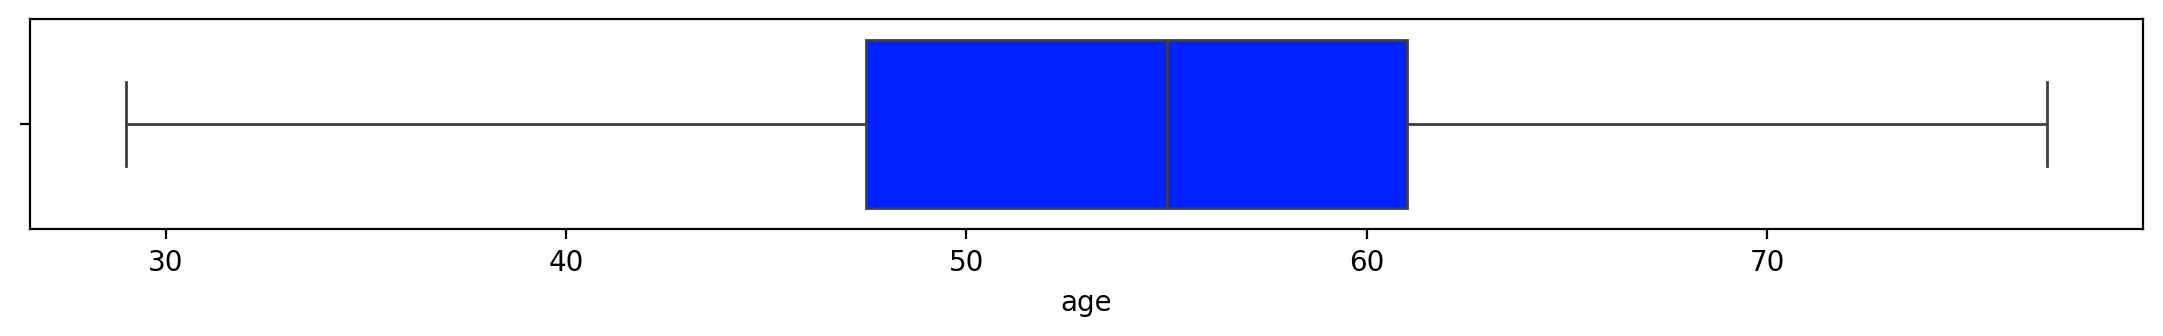

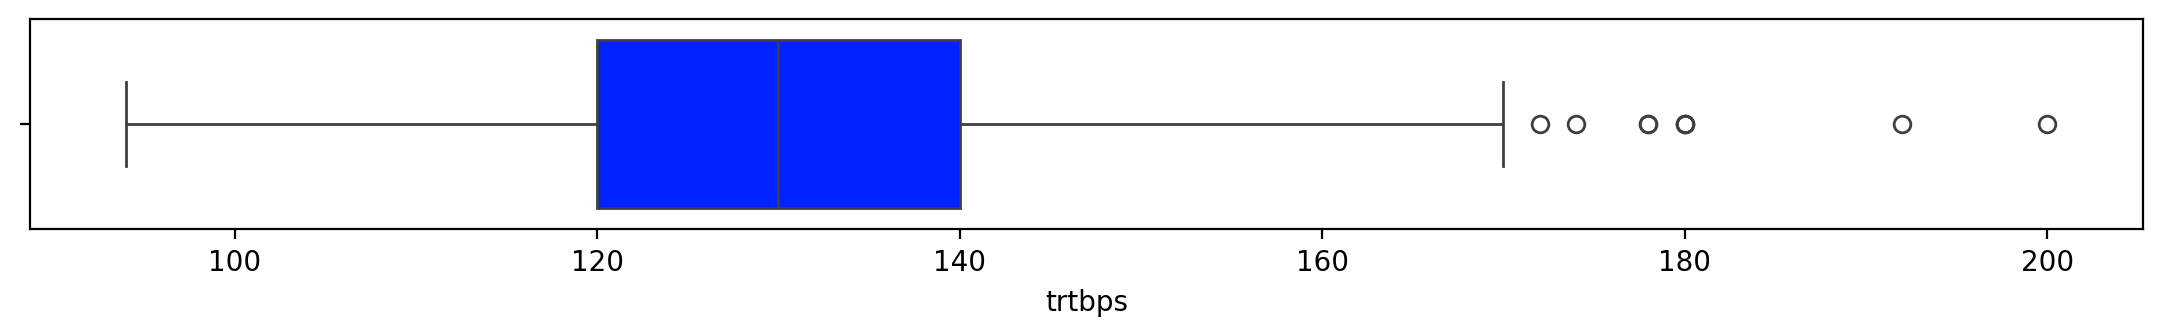

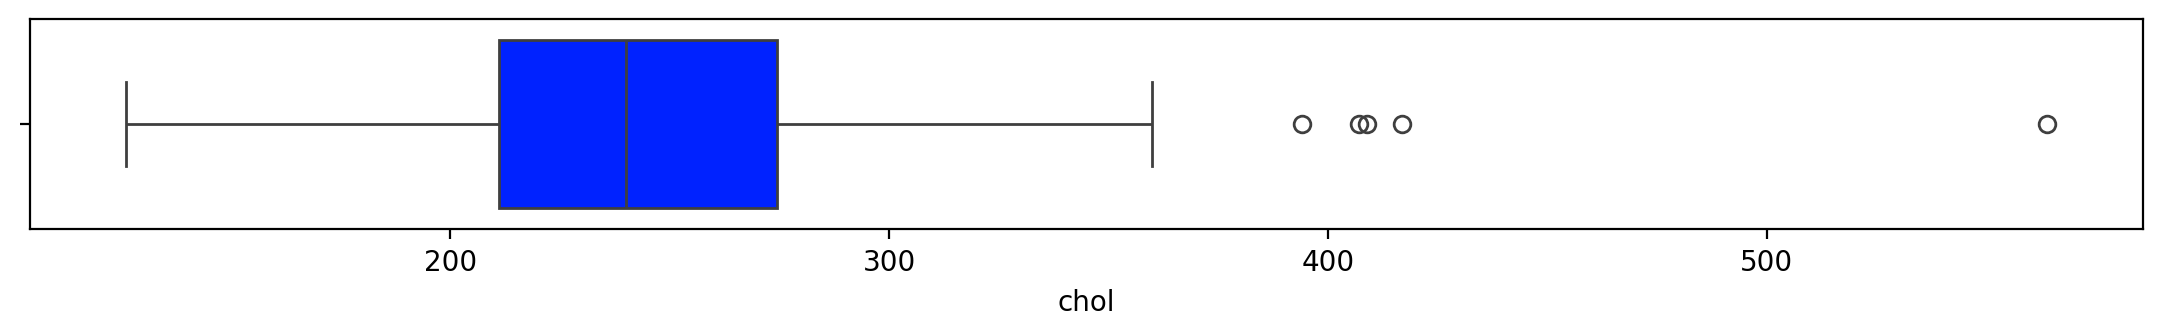

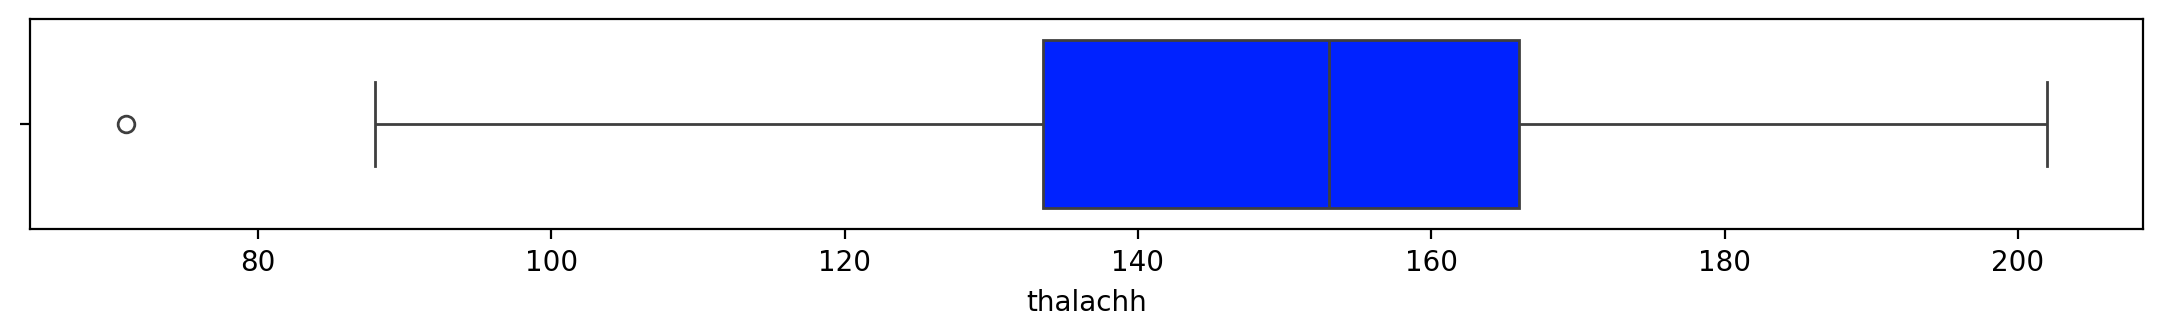

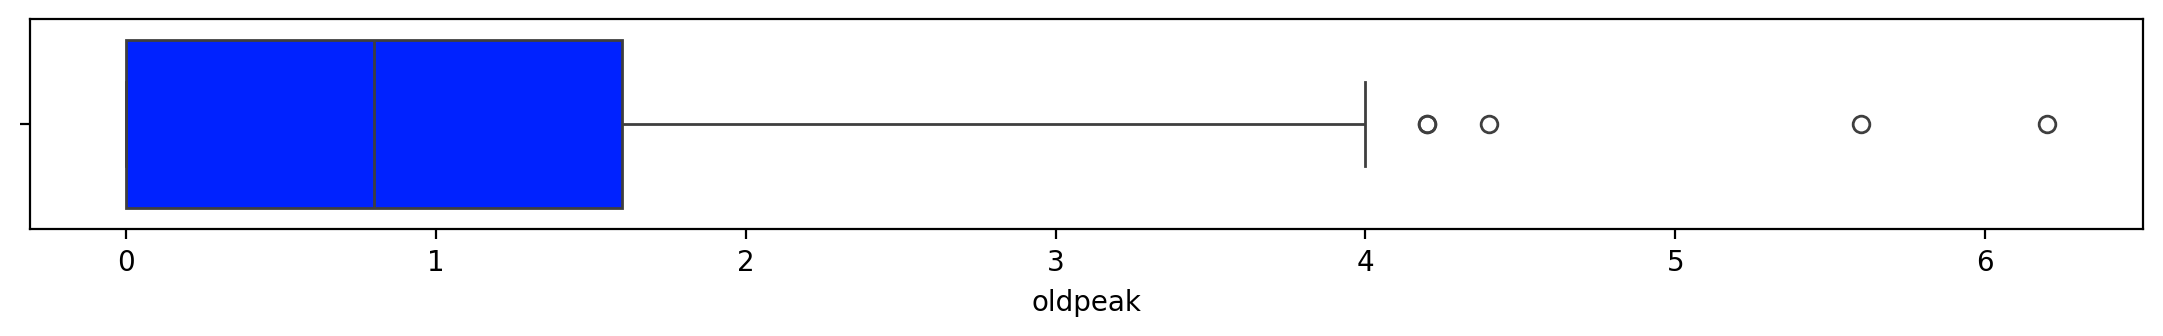

In [8]:
Numerical = ['age', 'trtbps','chol','thalachh','oldpeak']
i = 0
while i < 5:
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = Numerical[i], data = df,
           boxprops = dict(facecolor = "#0022FF"))
    i += 1
    plt.show()

In [13]:
Chol_noise = df[df["chol"]>400].index
Chol_noise

Index([28, 220, 246], dtype='int64')

In [11]:
df.drop(index=[85], inplace=True)
df.shape

(302, 14)

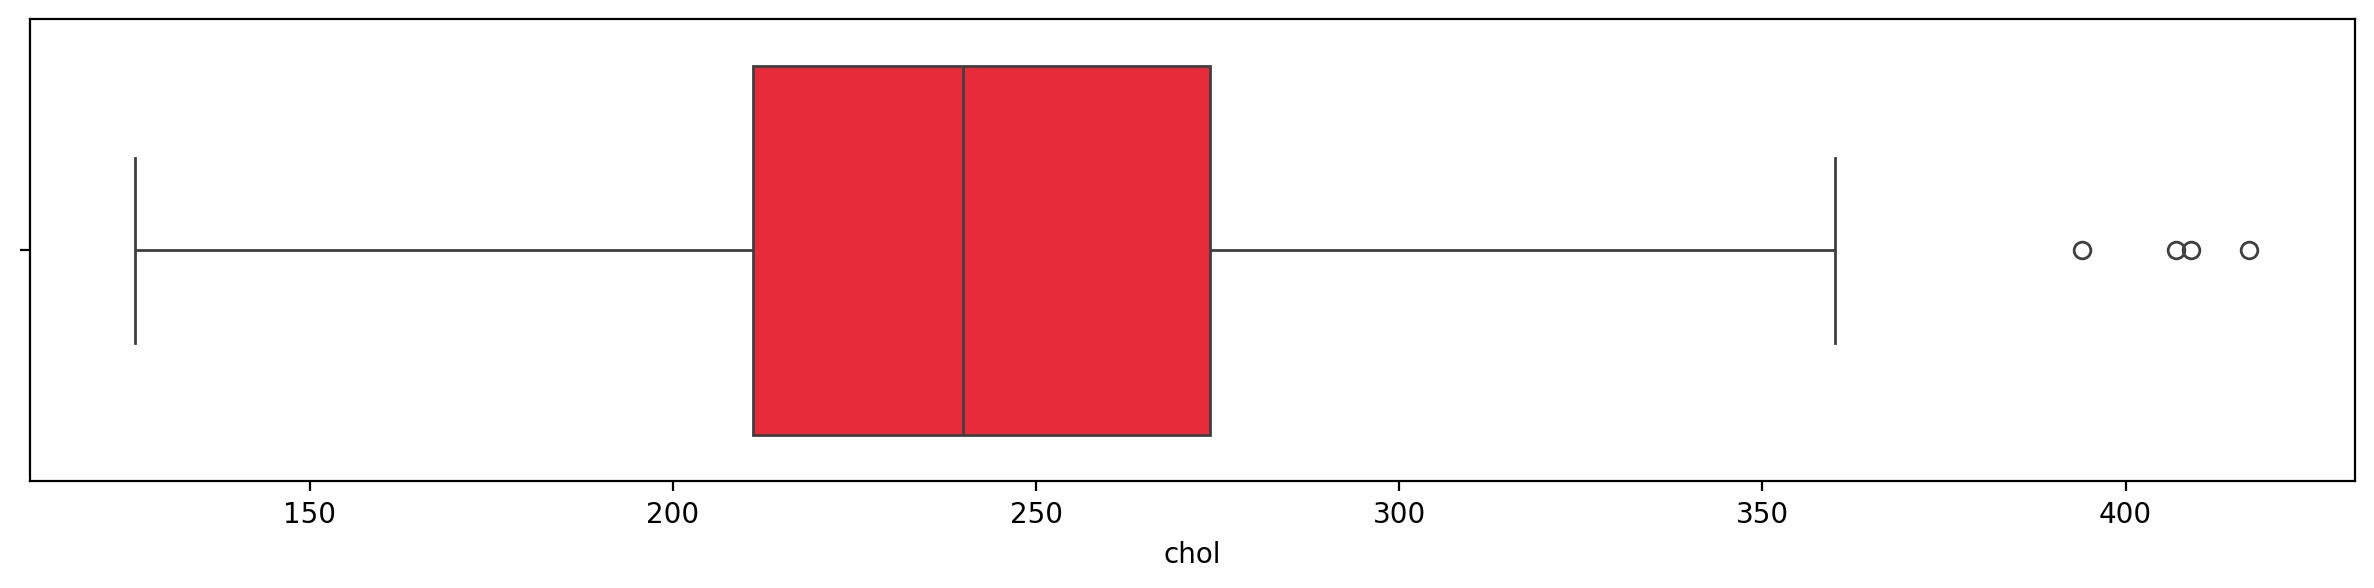

In [14]:
fig = plt.figure(figsize = [15,3], dpi=200)
sns.boxplot(x = 'chol', data = df,
        boxprops = dict(facecolor = "#E72B3B"))

plt.show()

<div style = 'border : 3px solid non; color:#f2f2f2 ; ;padding:10px'>


* **Seperation Dataset:**

  - Let's devide dataset to two parts for analysis. 1: People that don't have heart disease and 2: People who have it.



In [15]:
Target_0_data = df[df["output"]==0]
Target_0_data = pd.DataFrame(Target_0_data)
Target_1_data = df[df["output"]==1]
Target_1_data = pd.DataFrame(Target_1_data)
print("The shape of data when target is '0': Not disease",Target_0_data.shape)
print("The shape of data when target is '1': Disease",Target_1_data.shape)

The shape of data when target is '0': Not disease (138, 14)
The shape of data when target is '1': Disease (164, 14)


In [18]:
Target_0_data.sort_values(by=['age'], inplace=True)
Target_1_data.sort_values(by=['age'], inplace=True)

<div style = 'border : 3px solid non; color:#f2f2f2 ; ;padding:10px'>


* **Visualization:**

  - In this part of visualization, I use "sns.barplot" for categorical variables vs "age".
    We can see how the rate of change is affected by age.



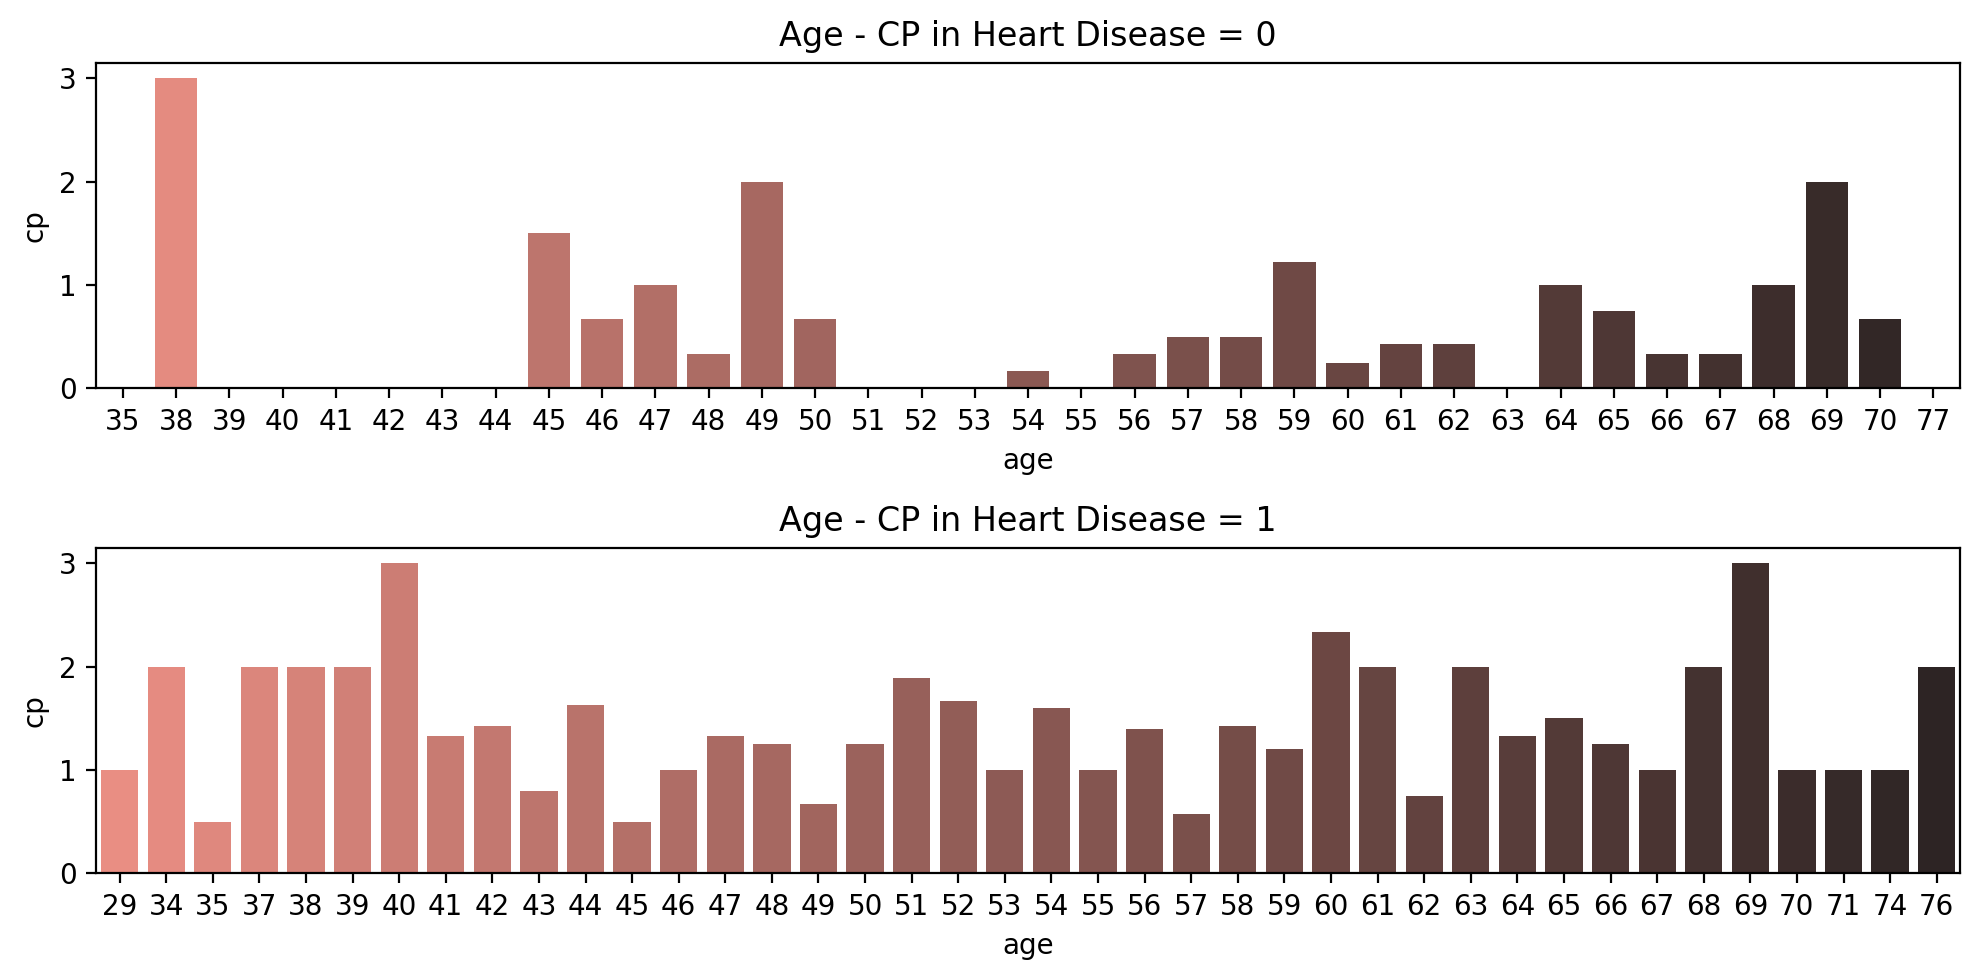

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['cp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - CP in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['cp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - CP in Heart Disease = 1')
plt.tight_layout()

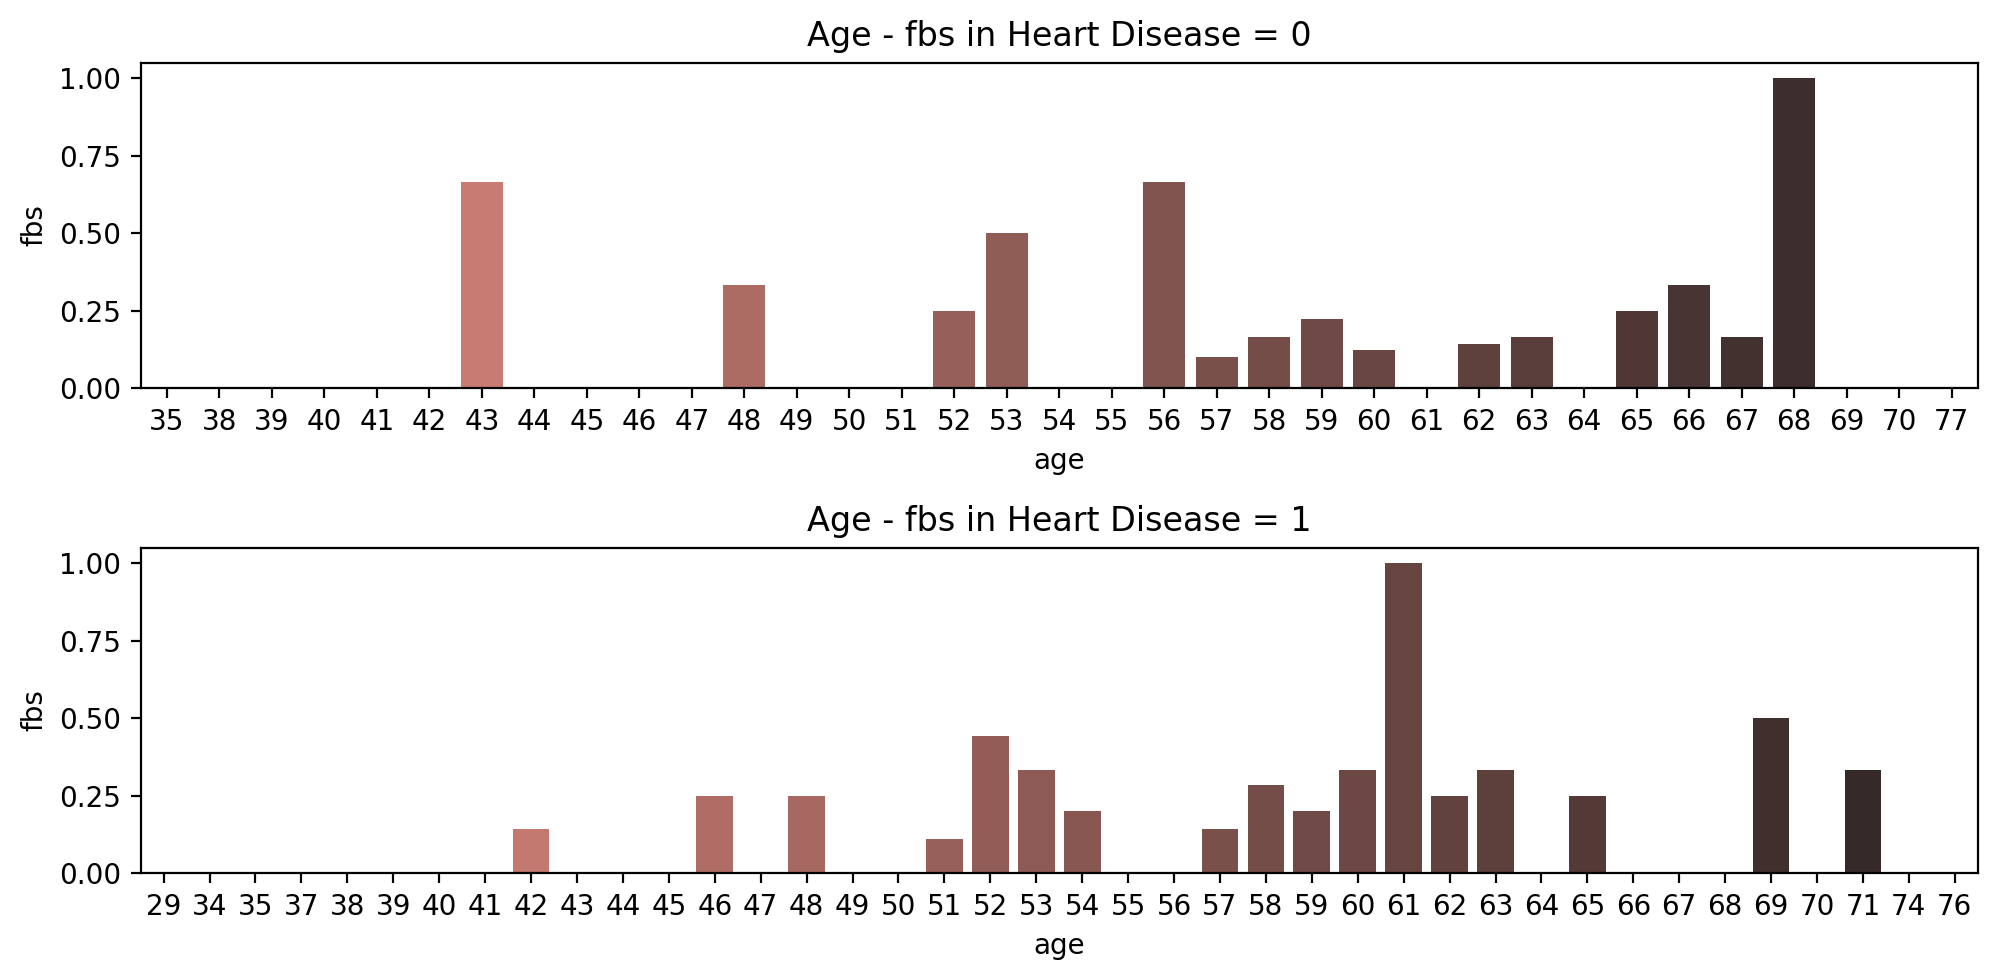

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['fbs'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - fbs in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['fbs'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - fbs in Heart Disease = 1')


plt.tight_layout()

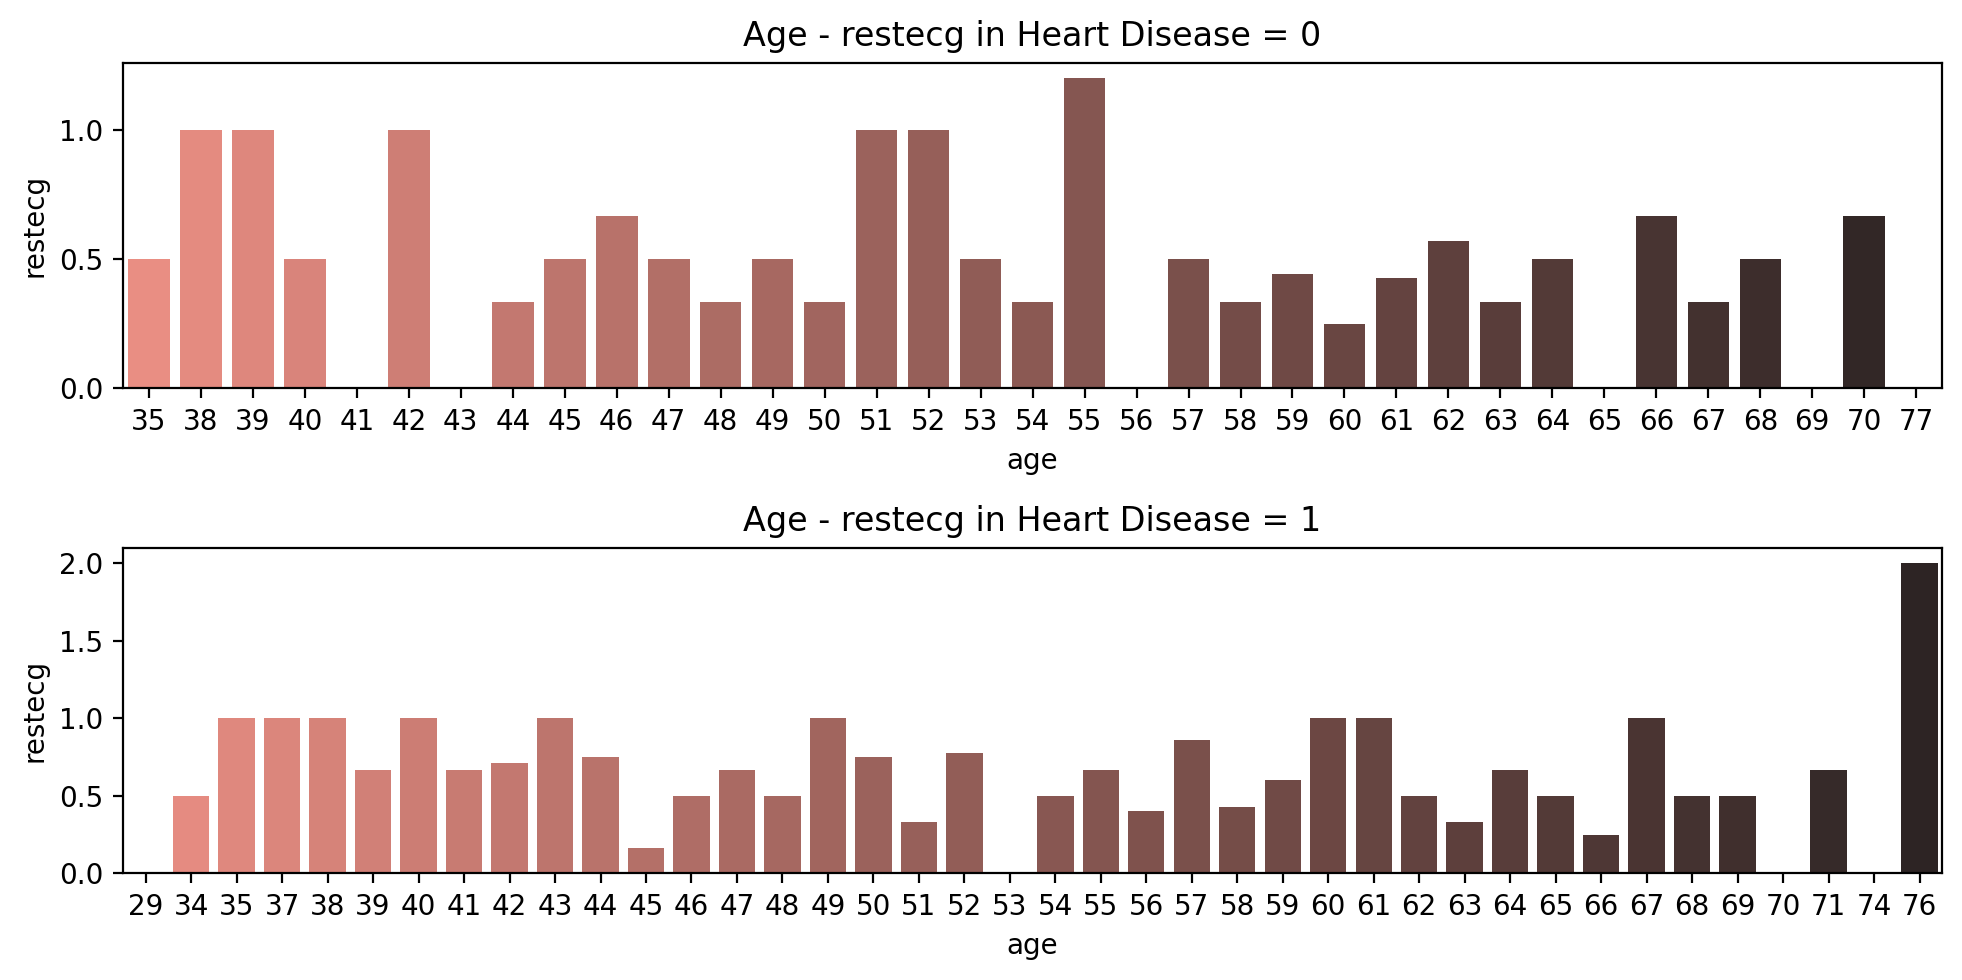

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['restecg'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - restecg in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['restecg'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - restecg in Heart Disease = 1')
plt.tight_layout()

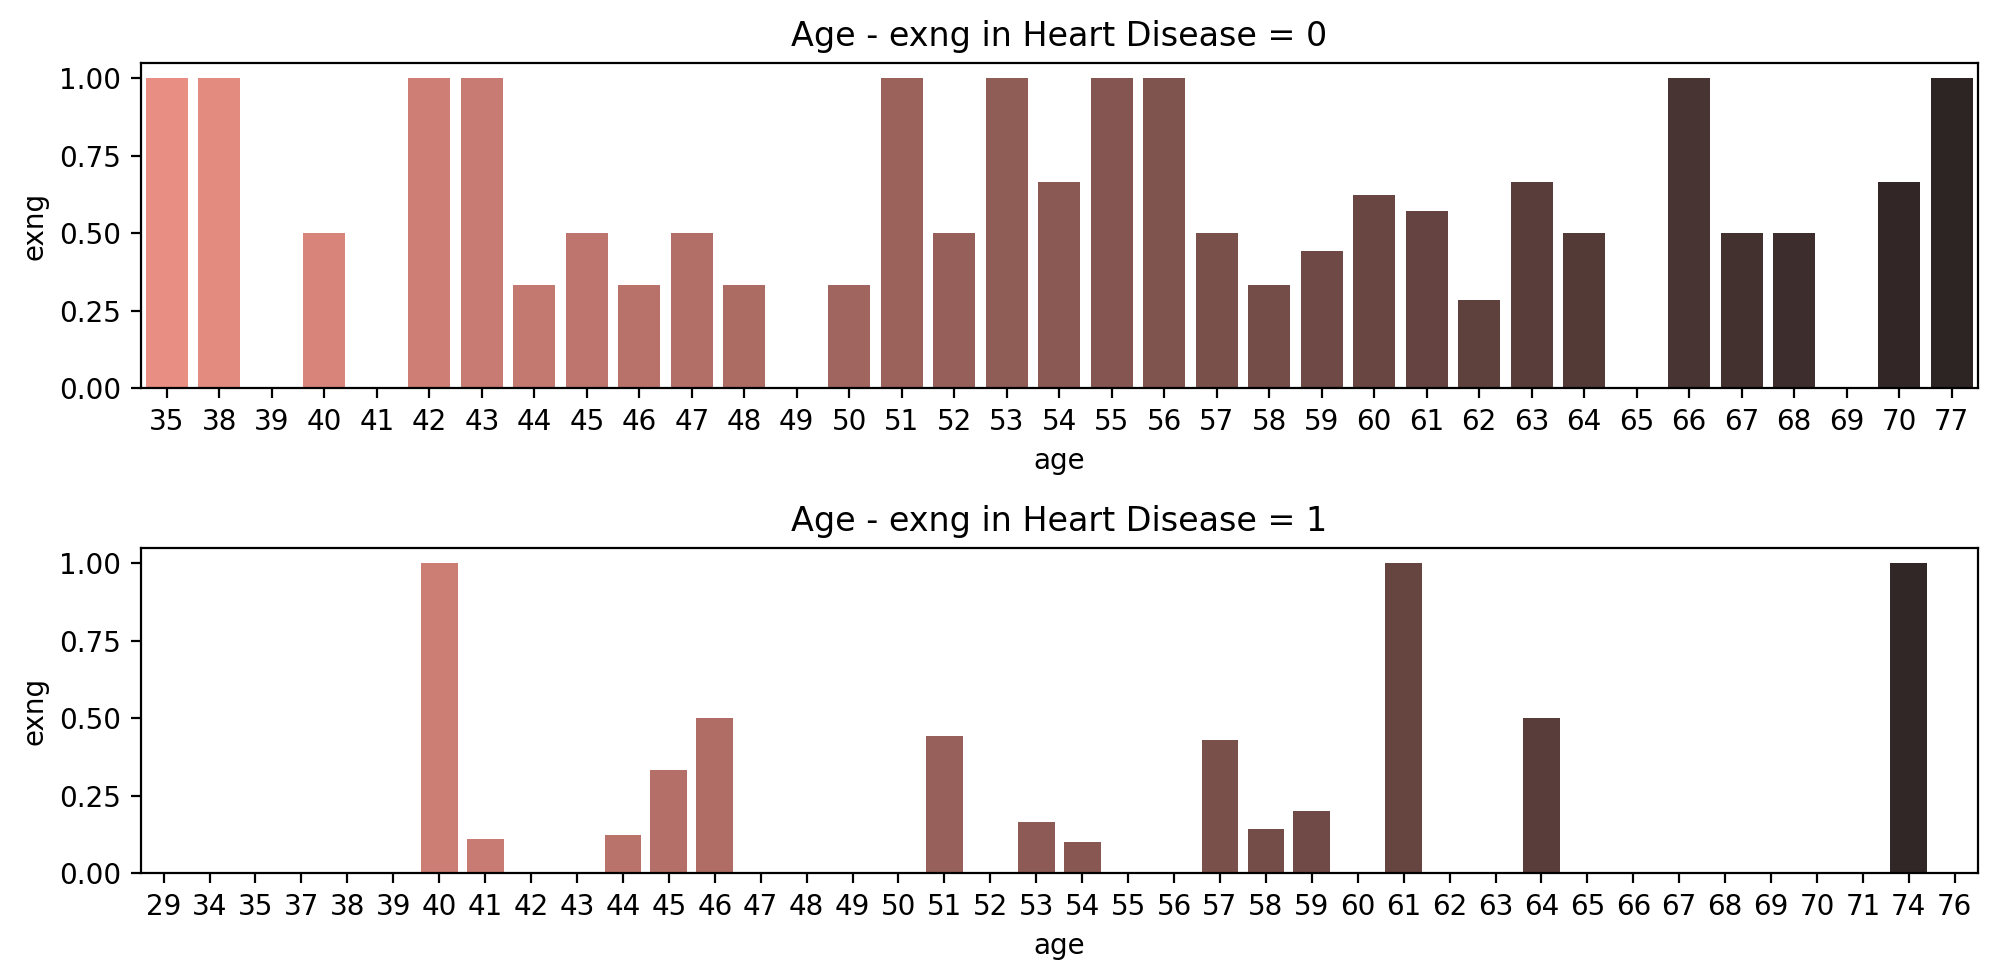

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['exng'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - exng in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['exng'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - exng in Heart Disease = 1')


plt.tight_layout()

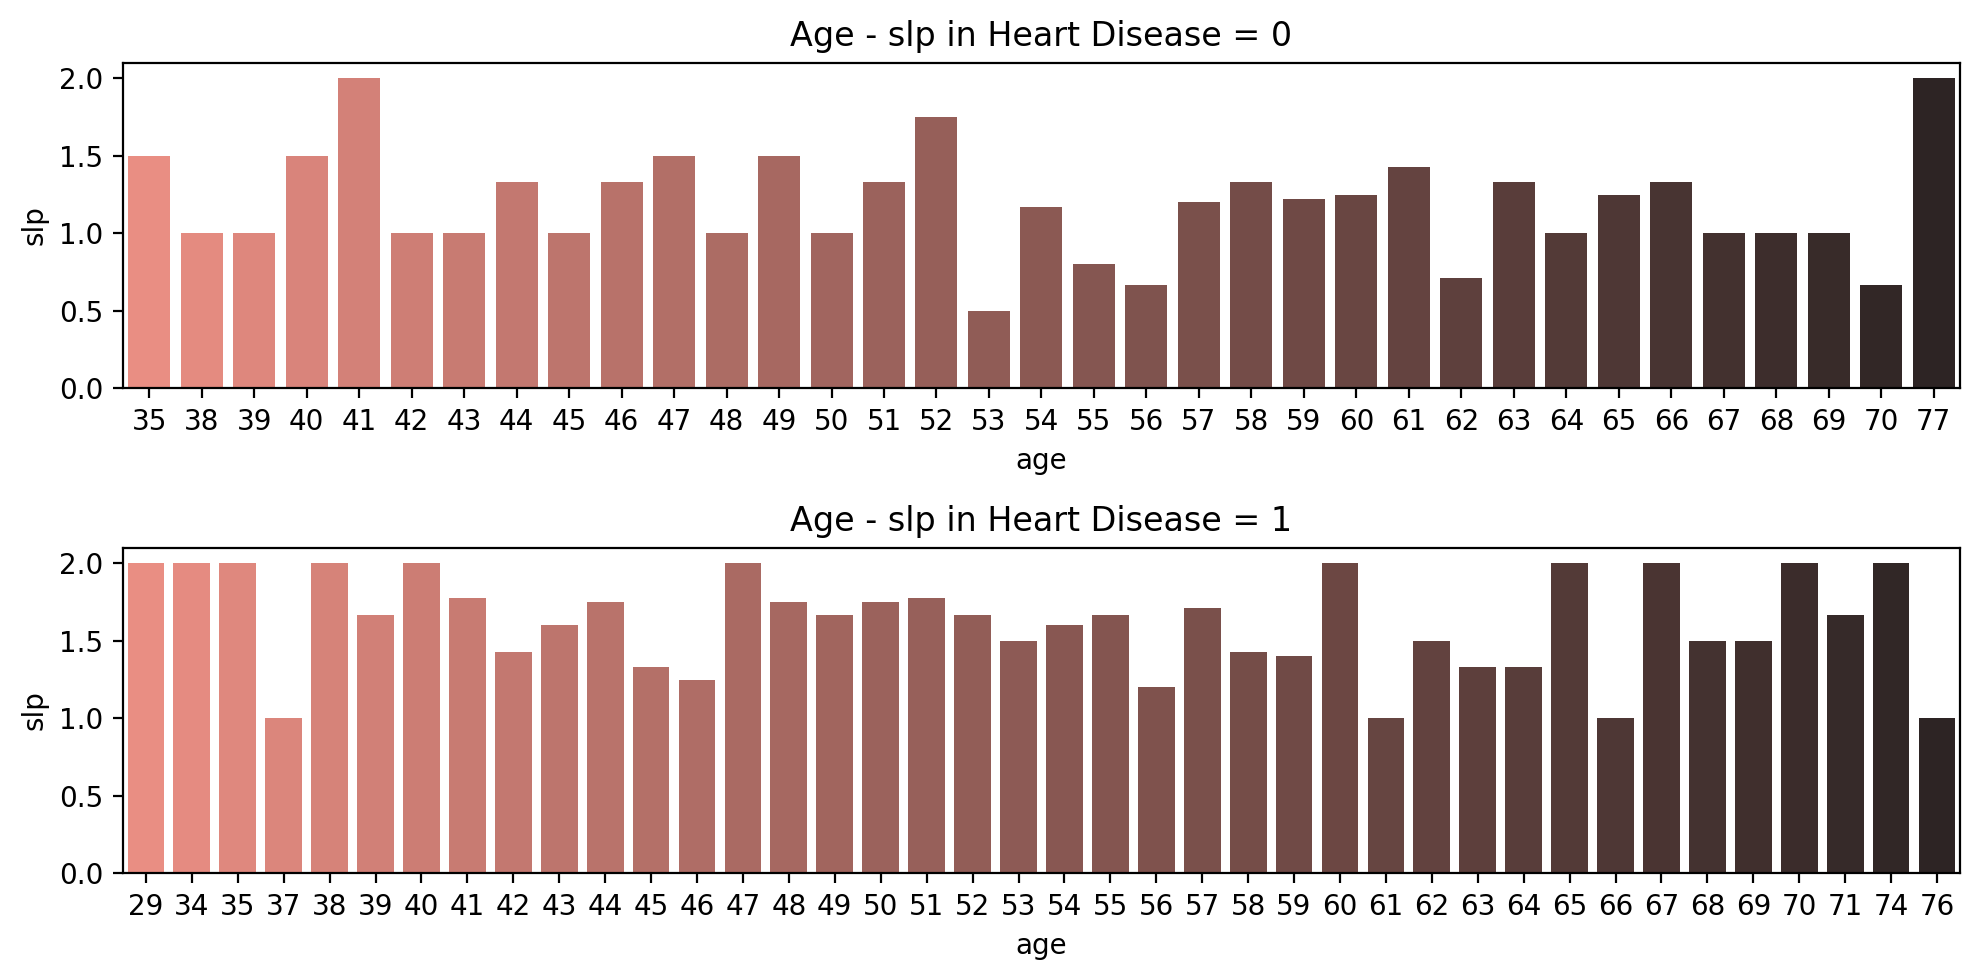

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['slp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - slp in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['slp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - slp in Heart Disease = 1')


plt.tight_layout()

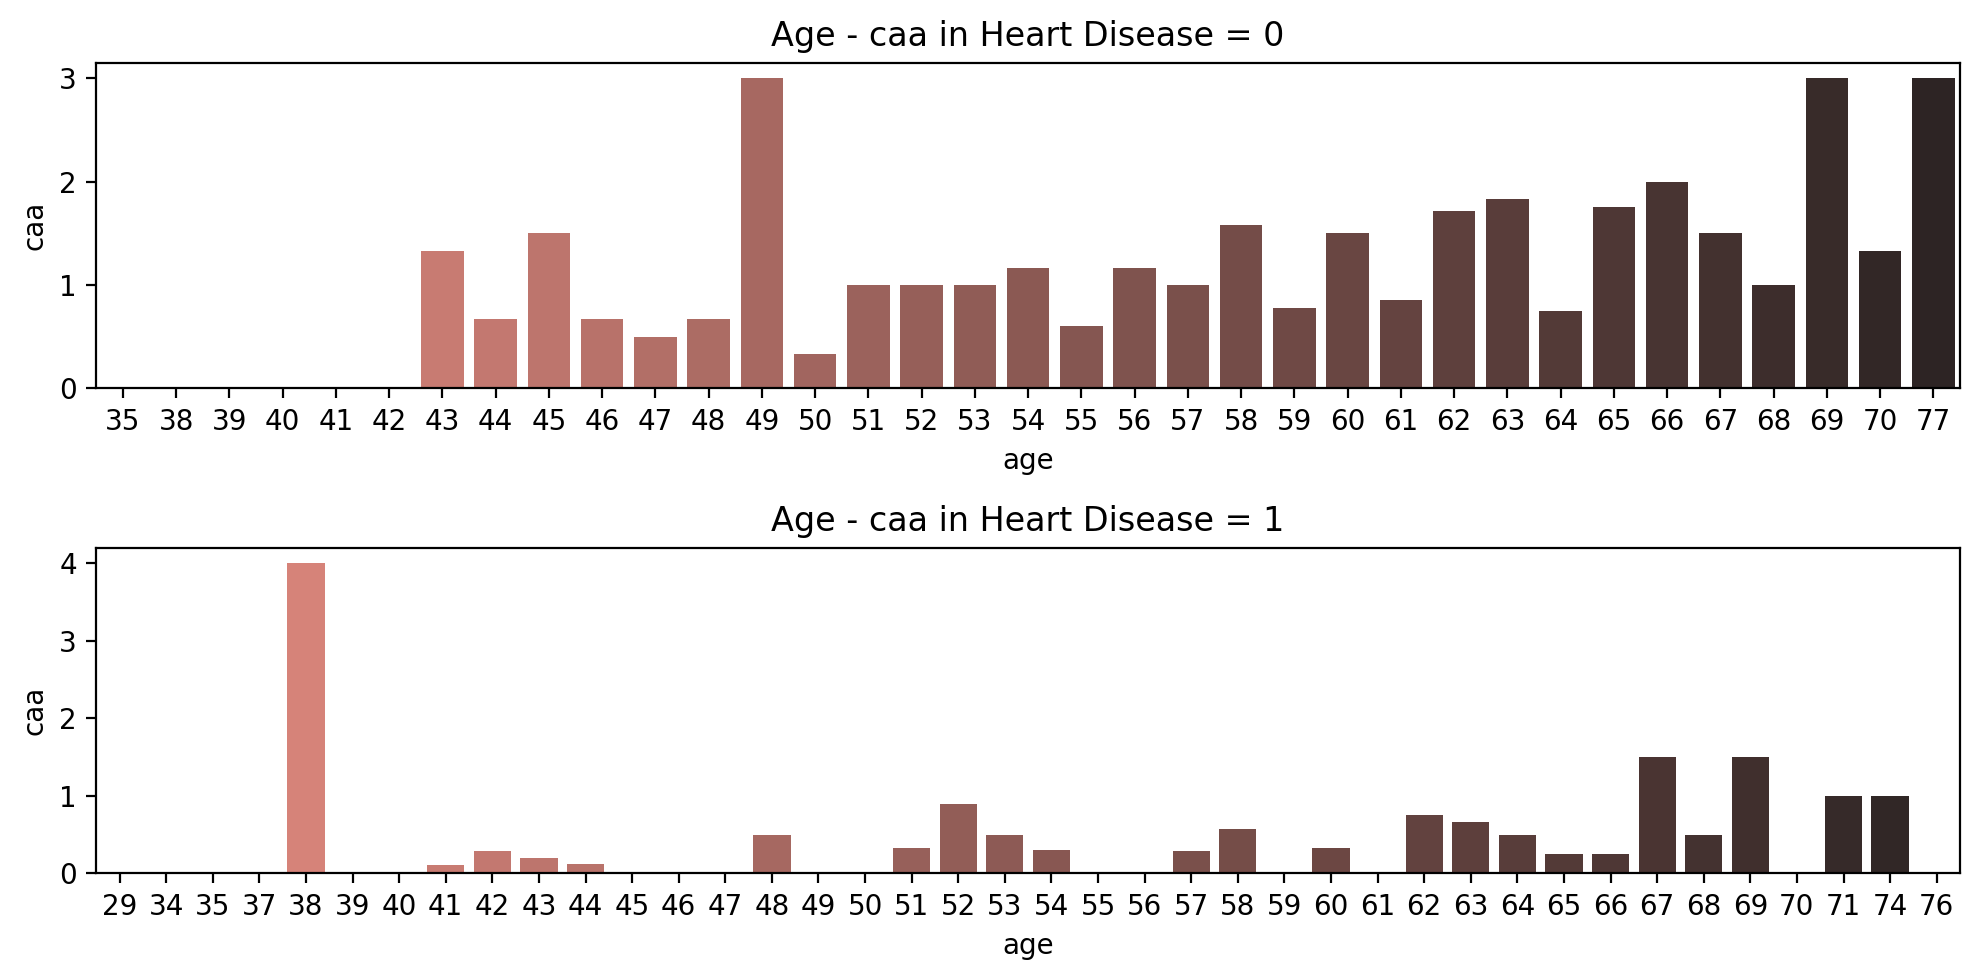

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['caa'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - caa in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['caa'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - caa in Heart Disease = 1')


plt.tight_layout()

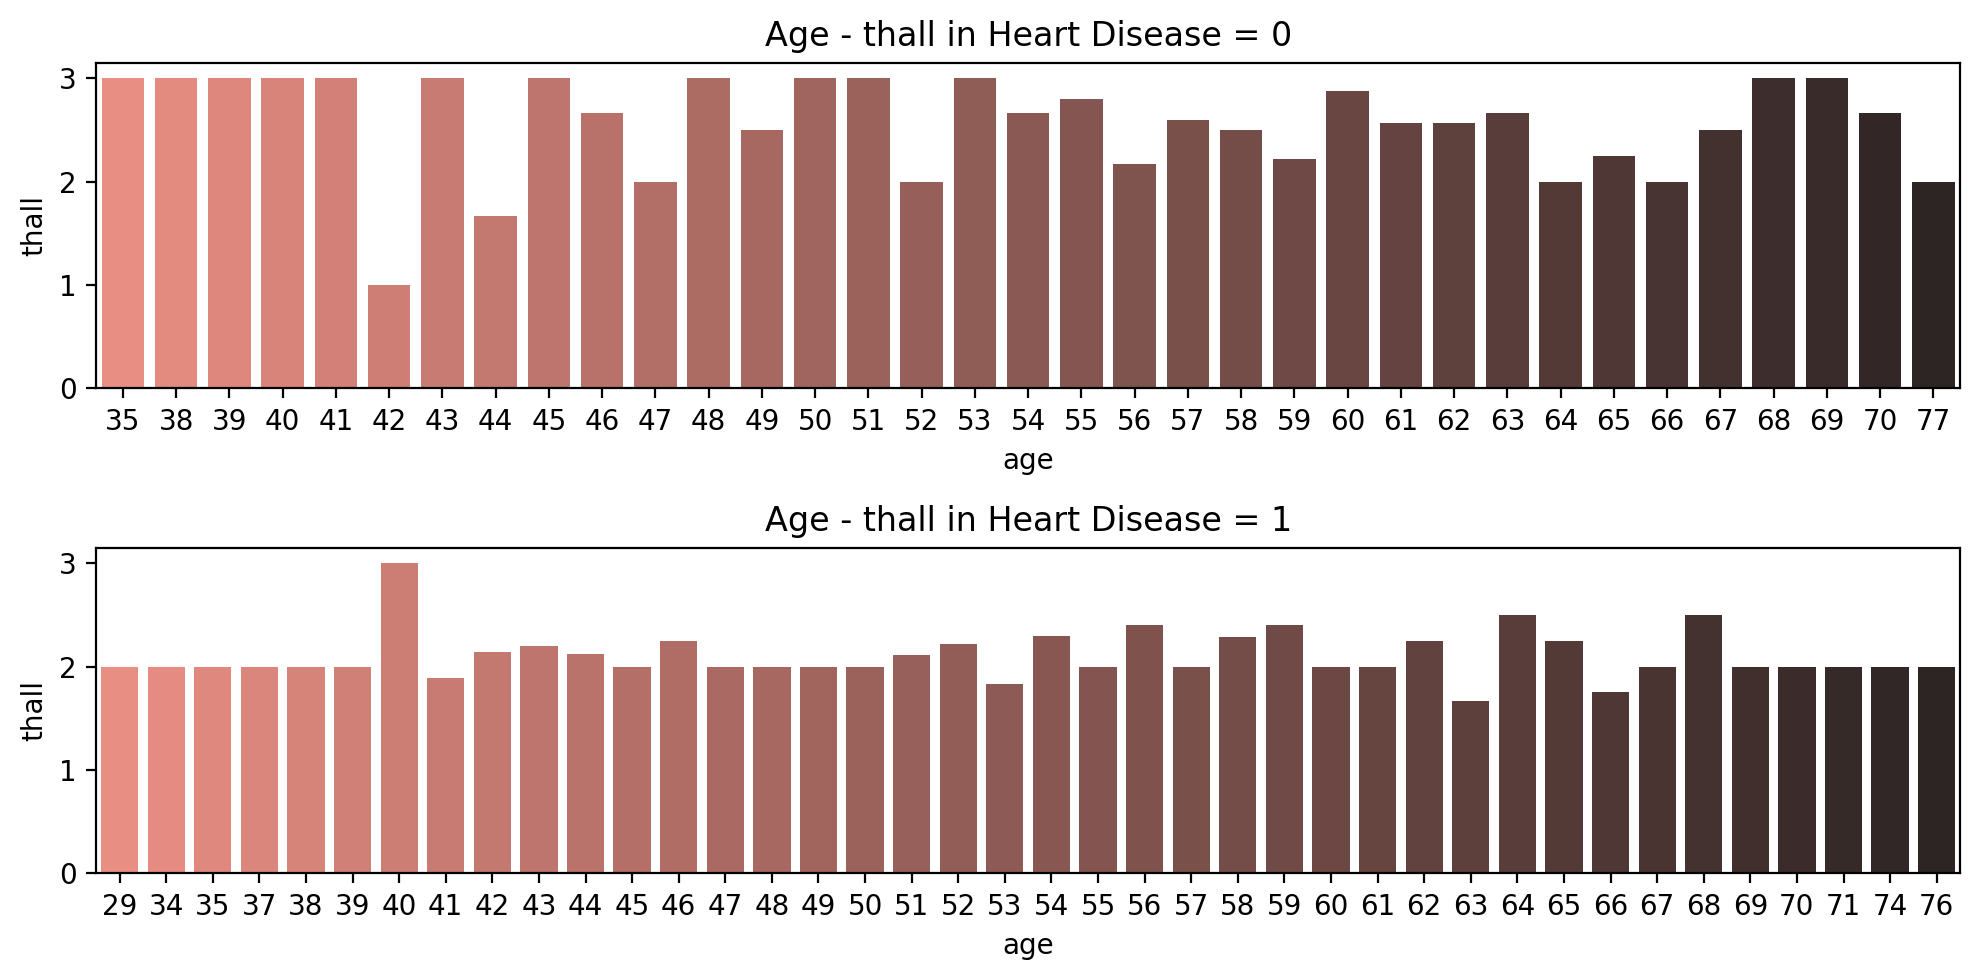

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['thall'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - thall in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['thall'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - thall in Heart Disease = 1')


plt.tight_layout()

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>



  - In this part of the visualization, I use a "scatter plot" versus a "line plot" to compare people who have heart disease and people who don't.
    Of course we can see how the rate of change is affected by age.
    



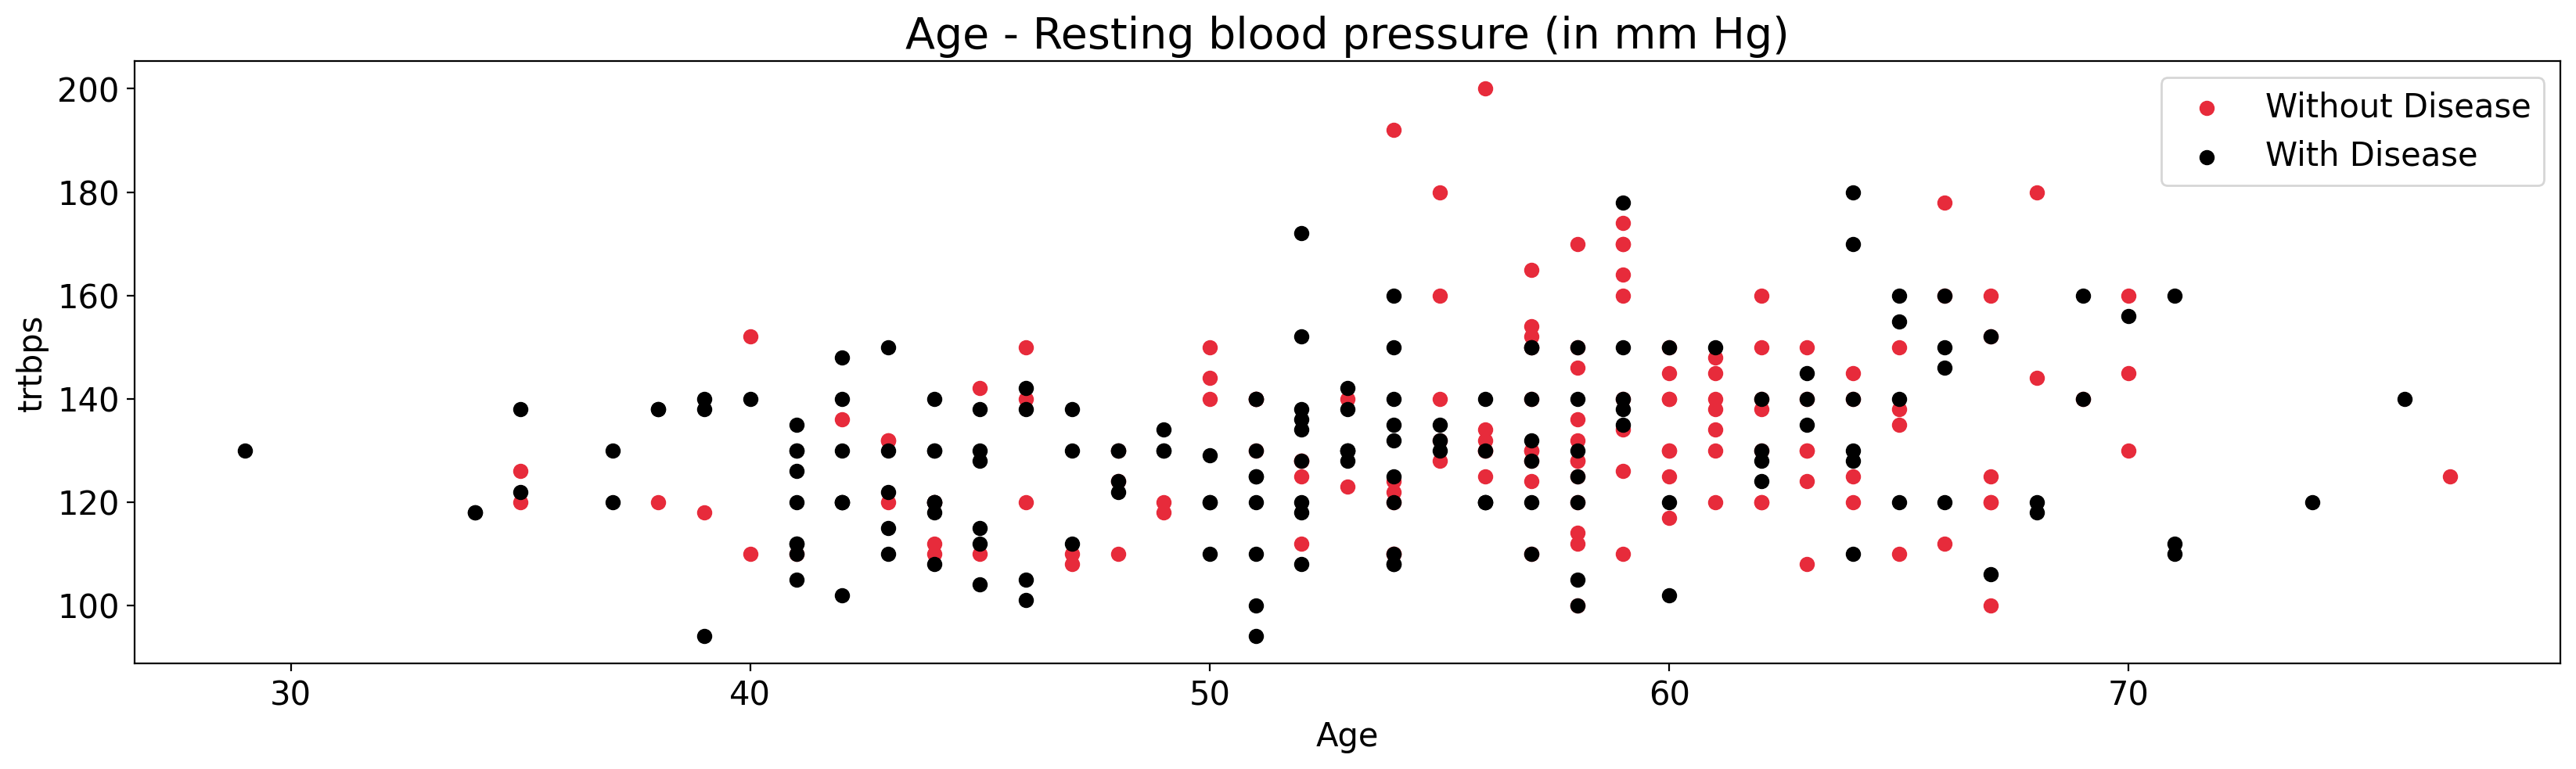

In [21]:
plt.figure(figsize=(20,5), dpi=200)
plt.scatter(Target_0_data['age'], Target_0_data['trtbps'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['trtbps'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Resting blood pressure (in mm Hg)", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("trtbps", fontsize=15)


plt.show()

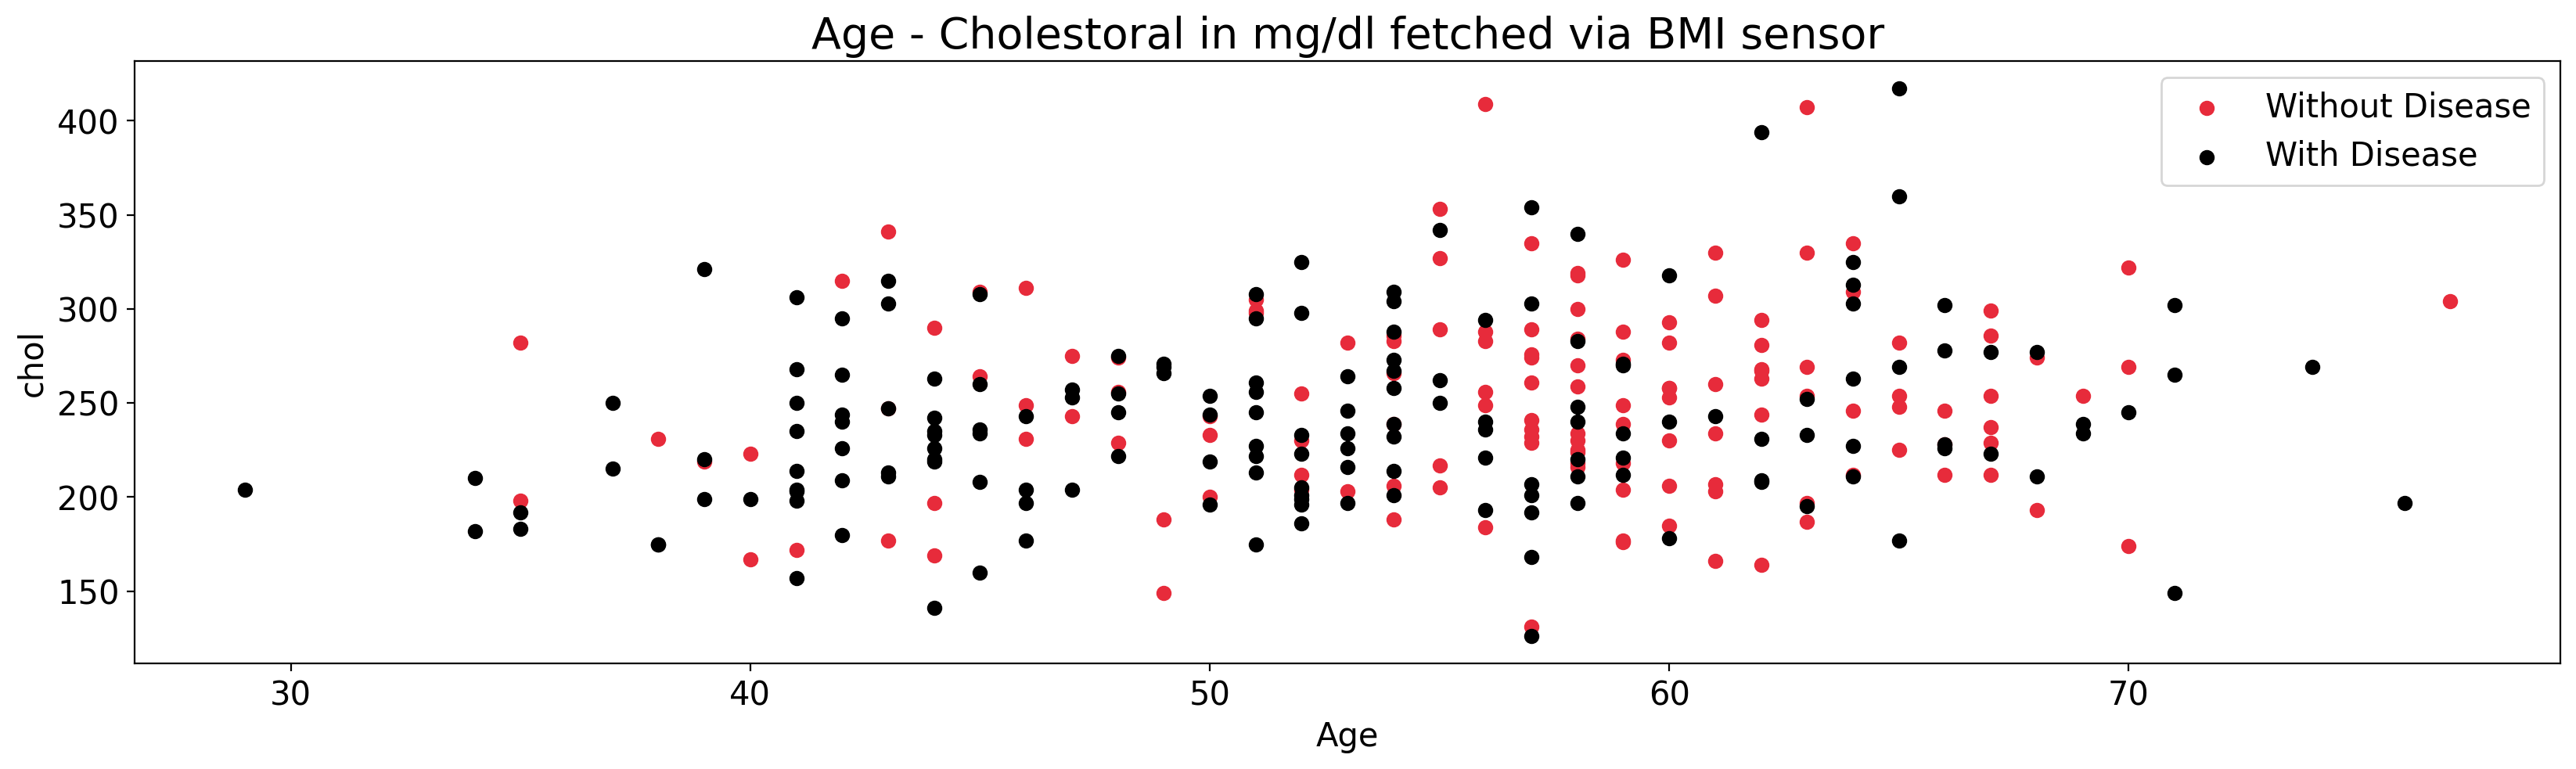

In [22]:
plt.figure(figsize=(20,5), dpi=200)
plt.scatter(Target_0_data['age'], Target_0_data['chol'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['chol'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Cholestoral in mg/dl fetched via BMI sensor", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("chol", fontsize=15)


plt.show()

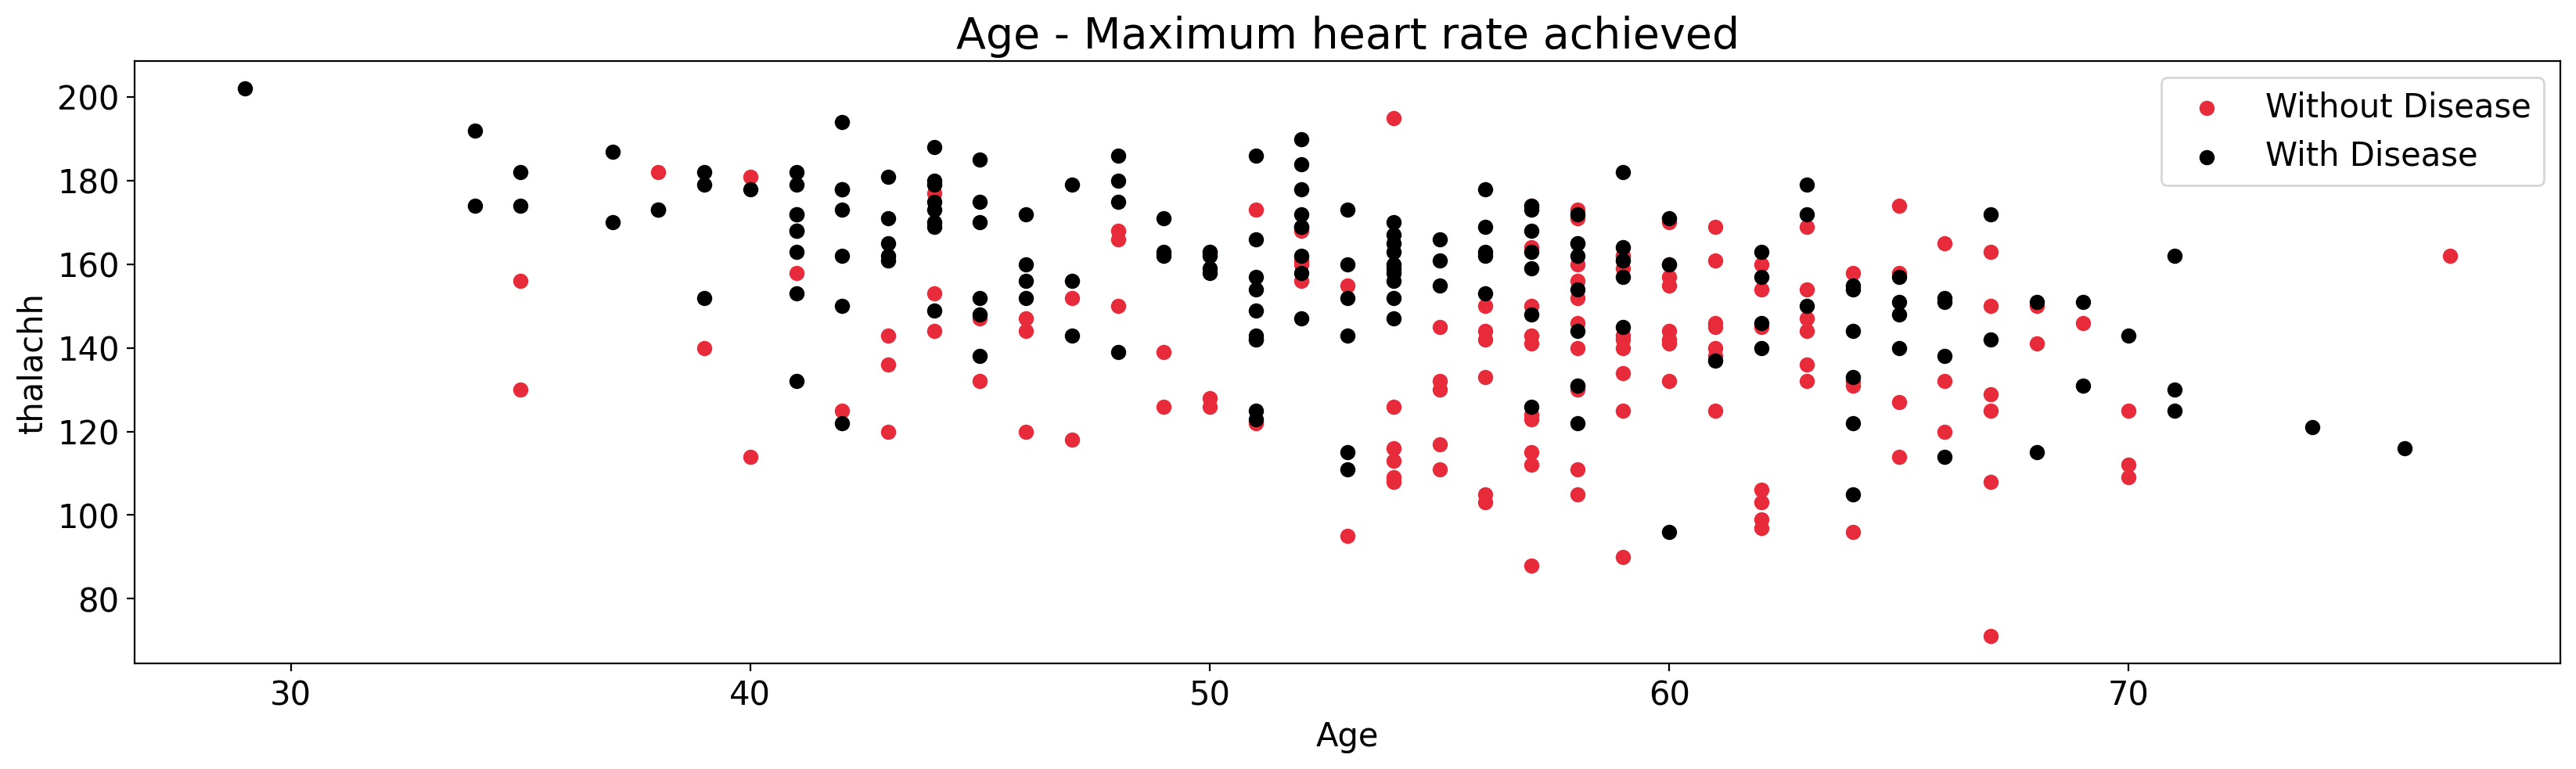

In [23]:
plt.figure(figsize=(20,5), dpi=200)
plt.scatter(Target_0_data['age'], Target_0_data['thalachh'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['thalachh'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Maximum heart rate achieved", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("thalachh", fontsize=15)


plt.show()

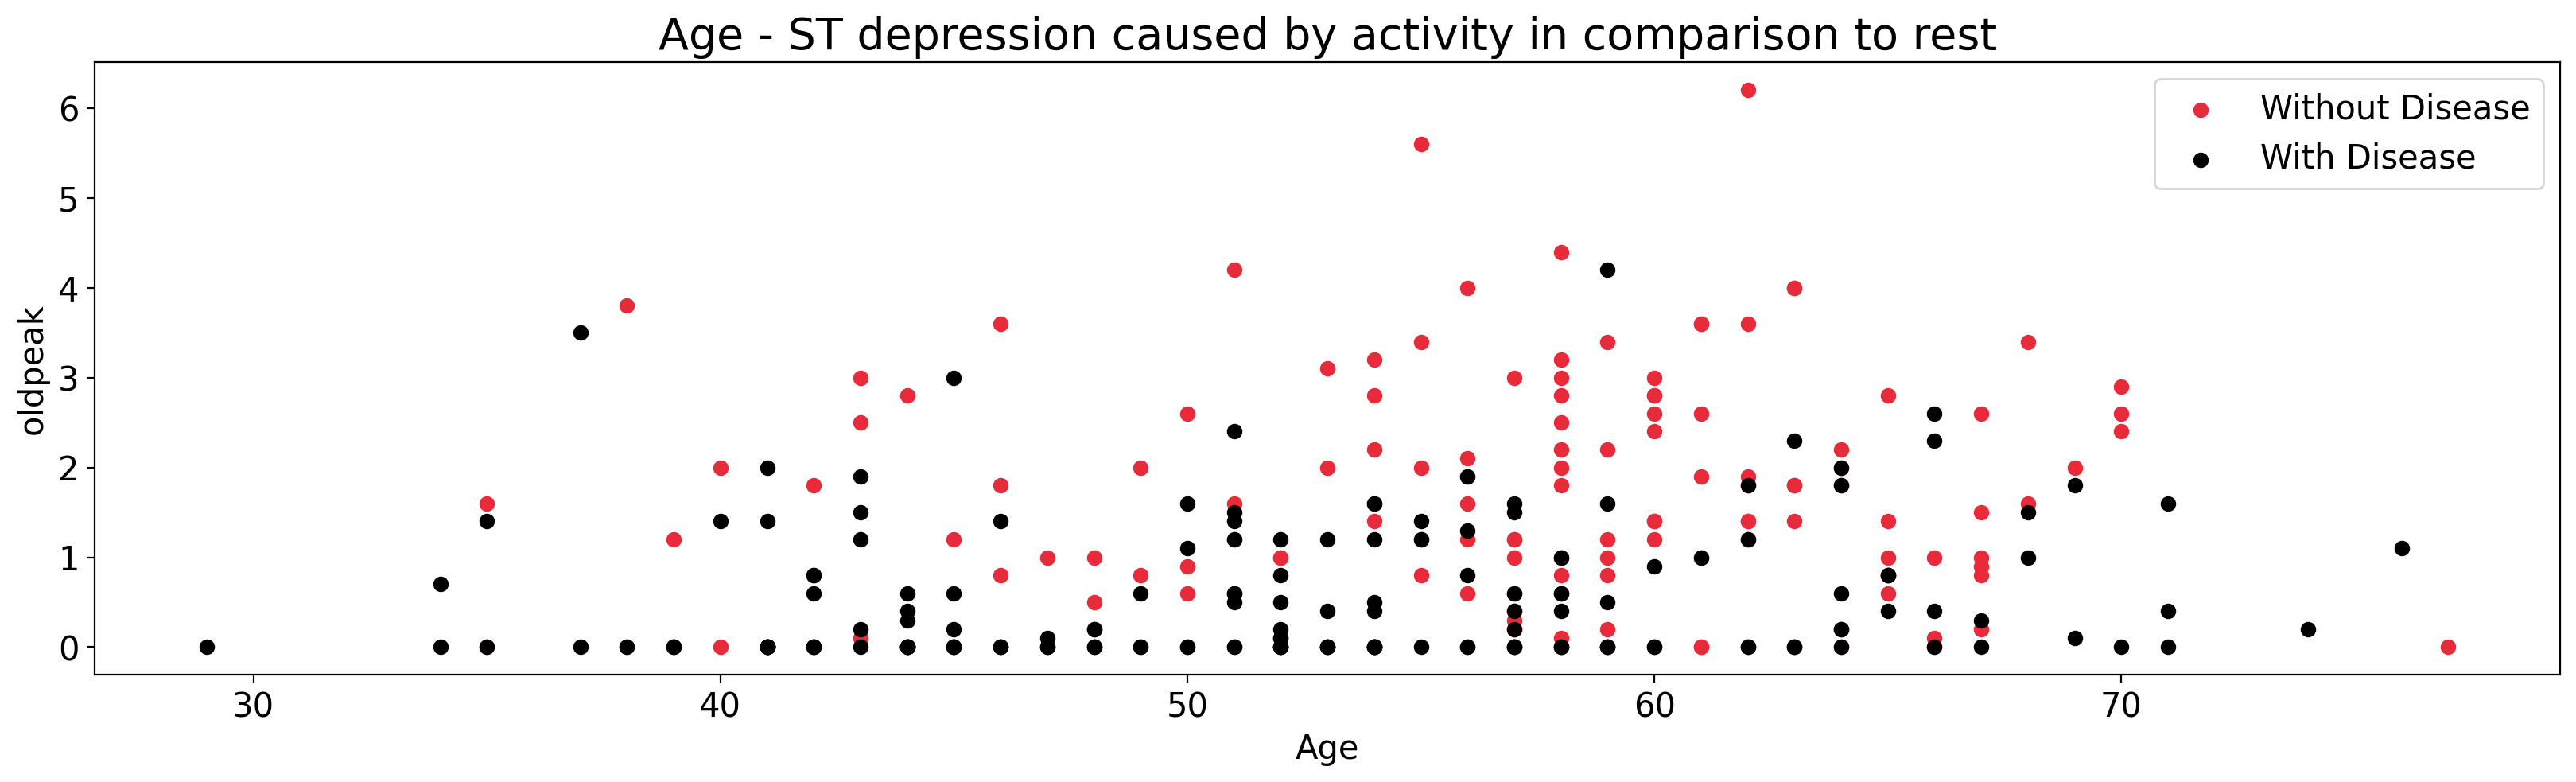

In [23]:
plt.figure(figsize=(20,5), dpi=200)
plt.scatter(Target_0_data['age'], Target_0_data['oldpeak'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['oldpeak'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - ST depression caused by activity in comparison to rest", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("oldpeak", fontsize=15)


plt.show()

<div style = 'border : 3px solid non; color:#f2f2f2 ; ;padding:10px'>


* **Normalize:**

  - Before starting the machine learning part, we must normalize the entire dataset (except target, but in this case, the target is binary and it's ok).
    



In [24]:

Features = df.drop(columns='output')
Features = pd.DataFrame(Features)

In [25]:
scaler = MinMaxScaler()
Norm_data = scaler.fit_transform(Features)
Norm_df = pd.DataFrame(Norm_data, columns= Features.columns)

desc_norm_df = describe(Norm_df)
desc_norm_df = desc_norm_df.style.set_caption('Overview of the dataset').set_table_styles(Styles)
desc_norm_df.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-cozlor': 'black'})
Norm_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [27]:
Norm_df.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.000000,1.000000,0.481132,0.367698,1.000000,0.000000,0.603053,0.000000,0.370968,0.000000,0.000000,0.333333
1,0.166667,1.000000,0.666667,0.339623,0.426117,0.000000,0.500000,0.885496,0.000000,0.564516,0.000000,0.000000,0.666667
2,0.250000,0.000000,0.333333,0.339623,0.268041,0.000000,0.000000,0.770992,0.000000,0.225806,1.000000,0.000000,0.666667
3,0.562500,1.000000,0.333333,0.245283,0.378007,0.000000,0.500000,0.816794,0.000000,0.129032,1.000000,0.000000,0.666667
4,0.583333,0.000000,0.000000,0.245283,0.783505,0.000000,0.500000,0.702290,1.000000,0.096774,1.000000,0.000000,0.666667
5,0.583333,1.000000,0.000000,0.433962,0.226804,0.000000,0.500000,0.587786,0.000000,0.064516,0.500000,0.000000,0.333333
6,0.562500,0.000000,0.333333,0.433962,0.577320,0.000000,0.000000,0.625954,0.000000,0.209677,0.500000,0.000000,0.666667
7,0.312500,1.000000,0.333333,0.245283,0.470790,0.000000,0.500000,0.778626,0.000000,0.000000,1.000000,0.000000,1.000000
8,0.479167,1.000000,0.666667,0.735849,0.250859,1.000000,0.500000,0.694656,0.000000,0.080645,1.000000,0.000000,1.000000
9,0.583333,1.000000,0.666667,0.528302,0.144330,0.000000,0.500000,0.786260,0.000000,0.258065,1.000000,0.000000,0.666667


<a id="5"></a>
# <p style="padding:10px;color:black ;margin:0;background-color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Machine Learning Models </p>

In [26]:
X = Norm_df
y = df['output'].values.reshape(-1,1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=40)

<div style = 'border : 3px solid non; color:#f2f2f2 ; ;padding:10px'>


* **KNN + tune hyperparameters**

  - The first algorithm is KNN. The strategy is simple. Create two empty lists for appending the accuracies of the model, then change some of the important hyperparameters. In knn, I consider the range of K and P as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



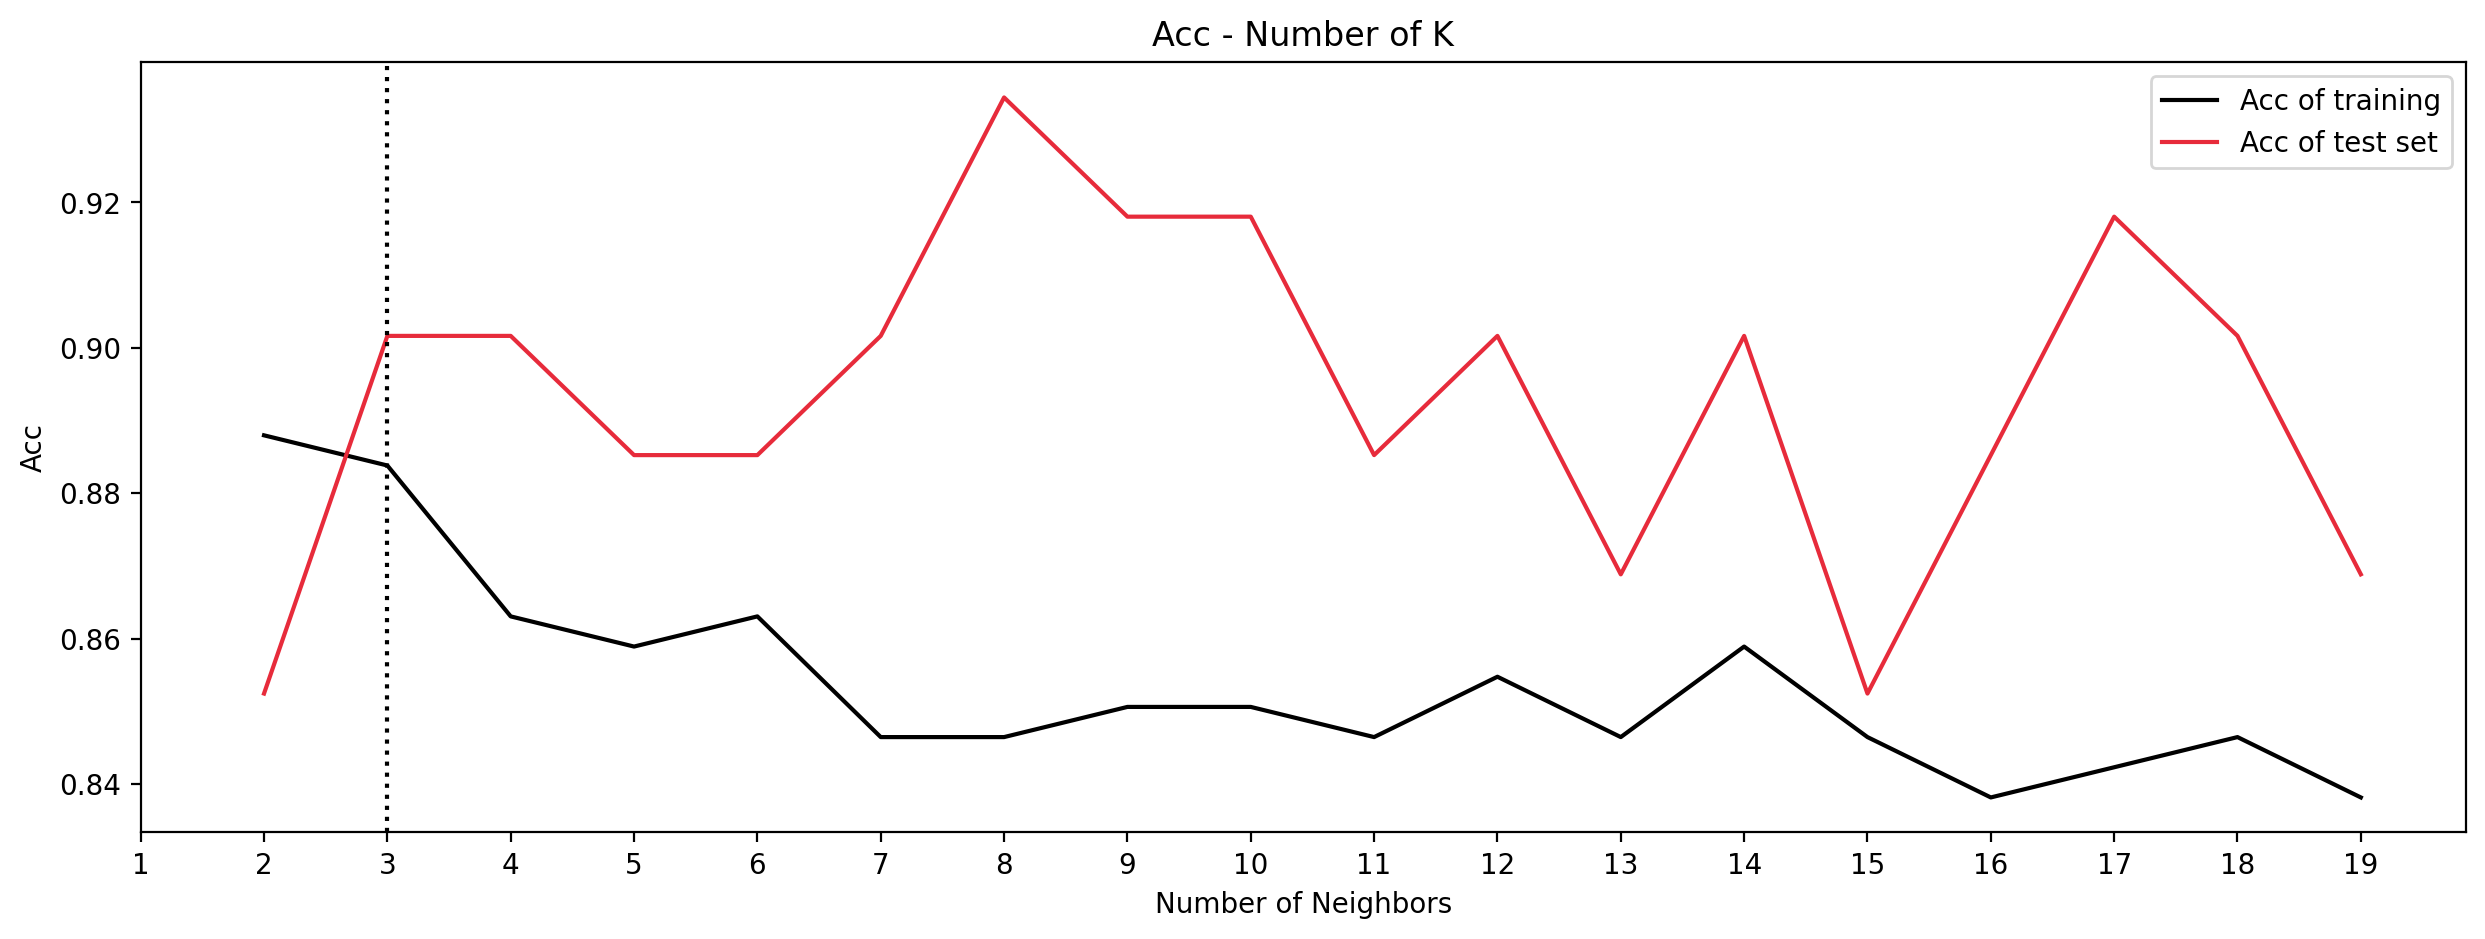

In [28]:
training_acc_1 = []
test_acc_1 = []

range_k = range(2,20)

for number_k in range_k:
    knn = KNeighborsClassifier(n_neighbors = number_k, p=1)
    knn.fit (X_train, y_train.ravel())
    training_acc_1.append(knn.score(X_train,y_train))
    test_acc_1.append(knn.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(range_k, training_acc_1, label='Acc of training', color= 'black')
plt.plot(range_k, test_acc_1, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of Neighbors')
plt.title('Acc - Number of K')
plt.legend()
plt.xticks(range(1,20))
plt.axvline(x = 3, linestyle= 'dotted', c= 'black')
plt.show()

In [29]:
K = 3
model1 = KNeighborsClassifier(K, p=1)
model1.fit(X_train, y_train.ravel())
y_pred_1 = model1.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_1))
Best_knn = metrics.accuracy_score(y_test,y_pred_1)

Accuracy 0.9016393442622951


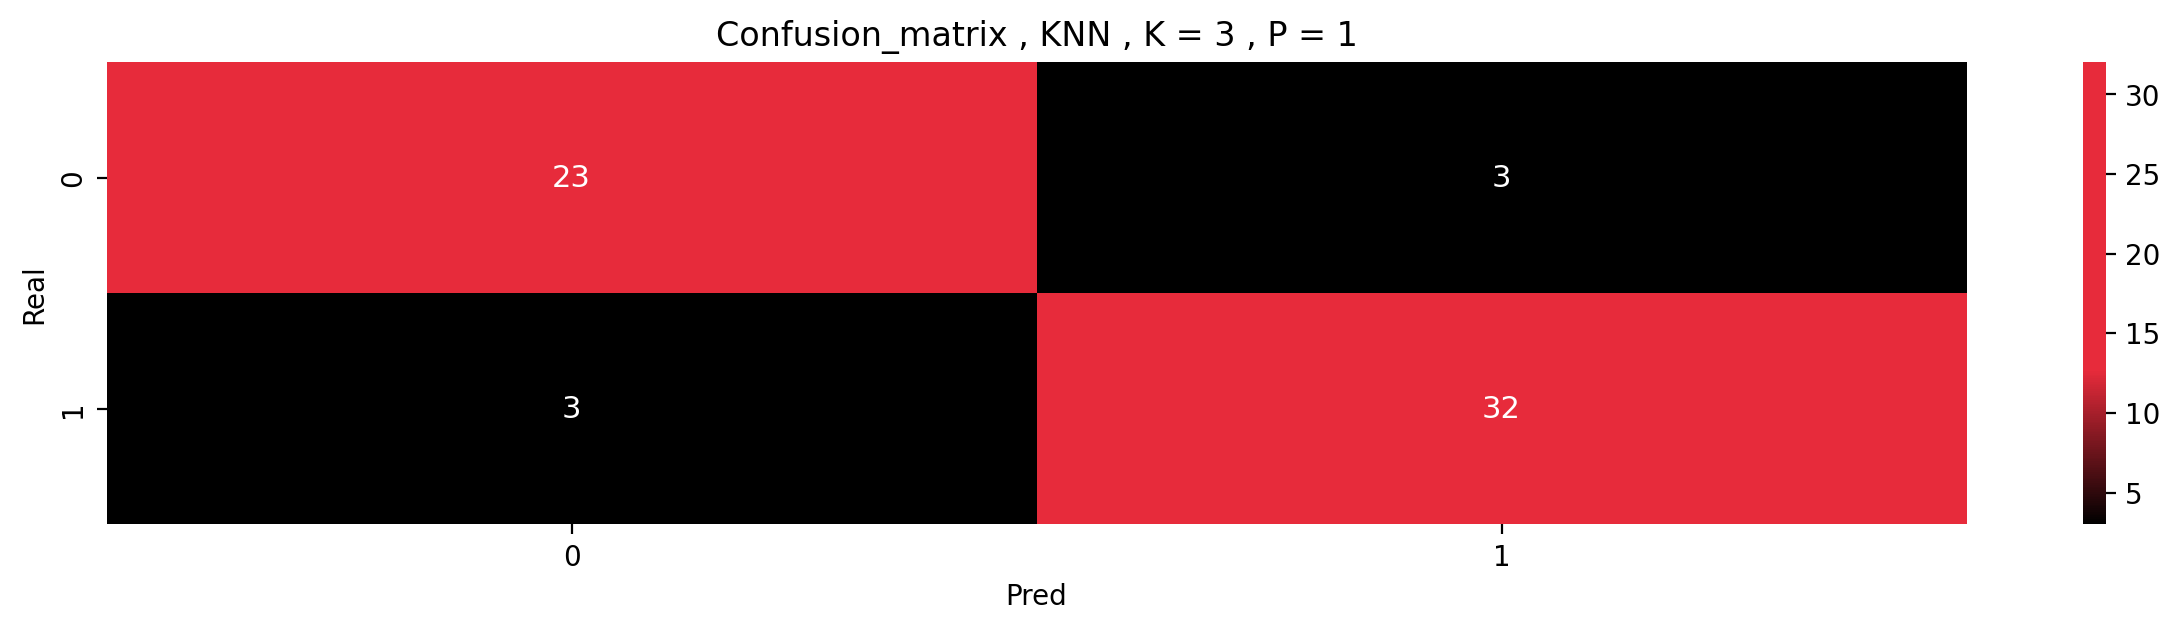

In [31]:
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix , KNN , K = 3 , P = 1")
annot = np.array([[f"{conf_matrix_1[0, 0]}", f"{conf_matrix_1[0, 1]}"],
                  [f"{conf_matrix_1[1, 0]}", f"{conf_matrix_1[1, 1]}"]], dtype=object)


sns.heatmap(conf_matrix_1,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )

plt.ylabel("Real")
plt.xlabel("Pred")

plt.show()

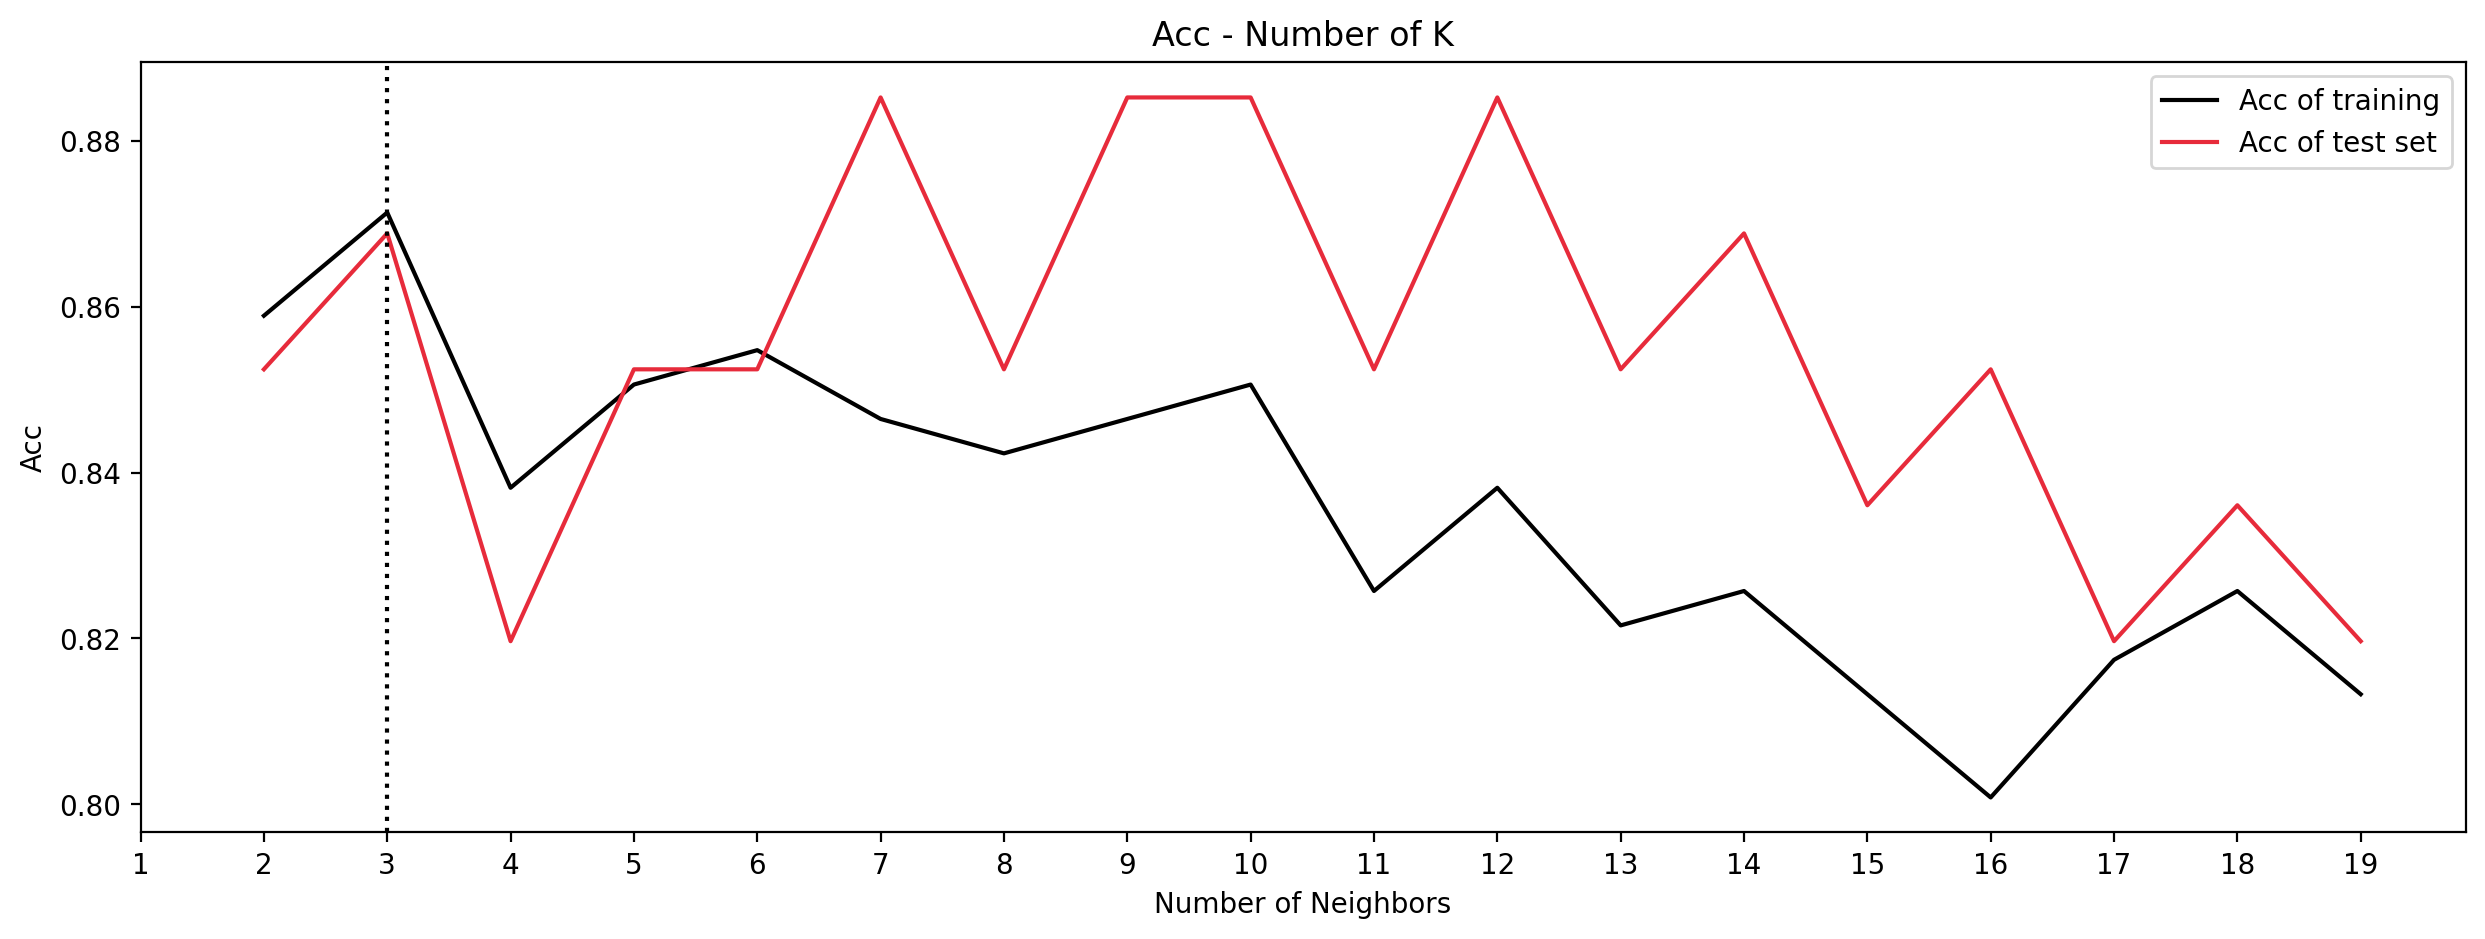

In [32]:
training_acc_2 = []
test_acc_2 = []

range_k = range(2,20)

for number_k in range_k:
    knn = KNeighborsClassifier(n_neighbors = number_k, p=2)
    knn.fit (X_train, y_train.ravel())
    training_acc_2.append(knn.score(X_train,y_train))
    test_acc_2.append(knn.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(range_k, training_acc_2, label='Acc of training', color= 'black')
plt.plot(range_k, test_acc_2, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of Neighbors')
plt.title('Acc - Number of K')
plt.legend()
plt.xticks(range(1,20))
plt.axvline(x = 3, linestyle= 'dotted', c= 'black')
plt.show()

In [33]:
K = 3
model2 = KNeighborsClassifier(K, p=2)
model2.fit(X_train, y_train.ravel())
y_pred_2 = model2.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_2))

Accuracy 0.8688524590163934


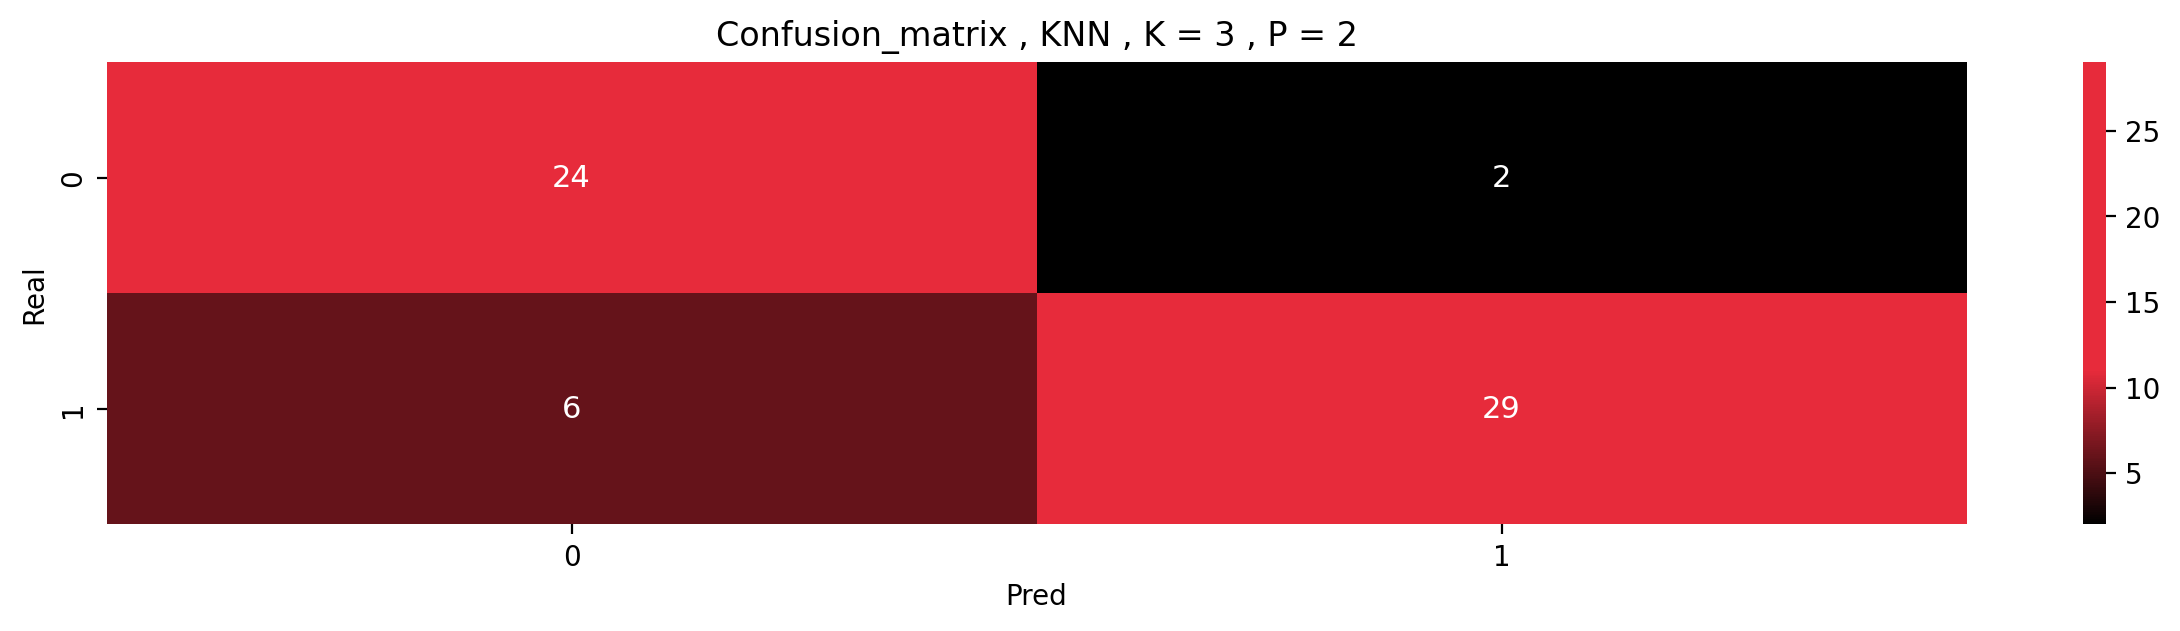

In [34]:
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix , KNN , K = 3 , P = 2")
annot = np.array([[f"{conf_matrix_2[0, 0]}", f"{conf_matrix_2[0, 1]}"],
                  [f"{conf_matrix_2[1, 0]}", f"{conf_matrix_2[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_2,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [35]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [36]:
print(Back.RED +color.BOLD+ "Classification report for model1 (K= 3 and p = 1):"+ Back.RESET+ color.END)
print(classification_report(y_train, model1.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for model2 (K= 3 and p = 2):"+ Back.RESET+ color.END)
print(classification_report(y_train, model2.predict(X_train)))

Classification report for model1 (K= 3 and p = 1):
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       112
           1       0.86      0.93      0.90       129

    accuracy                           0.88       241
   macro avg       0.89      0.88      0.88       241
weighted avg       0.89      0.88      0.88       241

Classification report for model2 (K= 3 and p = 2):
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       112
           1       0.86      0.91      0.88       129

    accuracy                           0.87       241
   macro avg       0.87      0.87      0.87       241
weighted avg       0.87      0.87      0.87       241



<div style = 'border : 3px solid non; color:#f2f2f2 ; ;padding:10px'>


* **SVM + tune hyperparameters**

  - The second algorithm is SVM. In SVM, I consider the range of C "0.05 - 50" and Kernles "Linear, Poly, RBF and sigmoid" as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



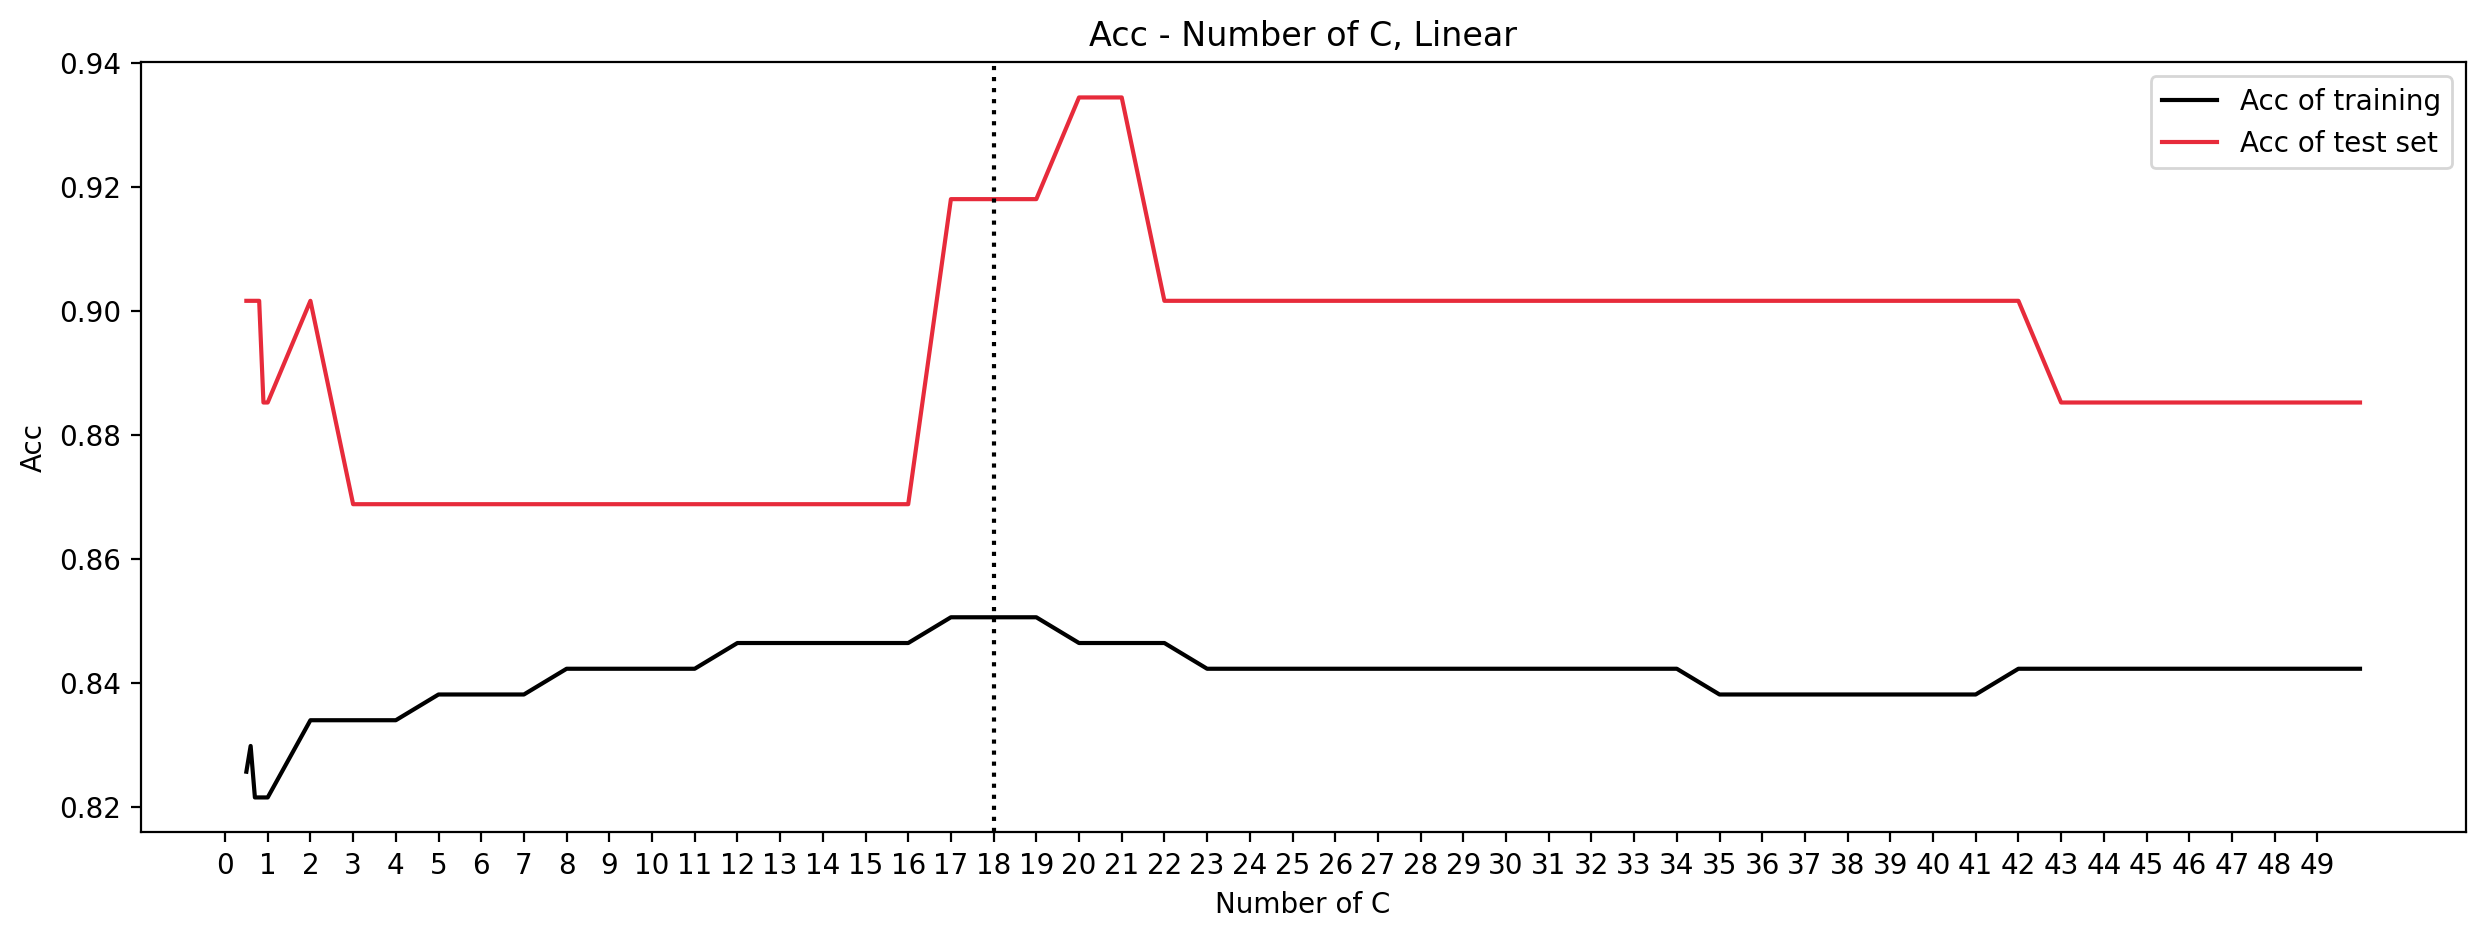

In [39]:
training_acc_3 = []
test_acc_3 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'linear')
    SVM.fit (X_train, y_train.ravel())
    training_acc_3.append(SVM.score(X_train,y_train))
    test_acc_3.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_3, label='Acc of training', color= 'black')
plt.plot(C, test_acc_3, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C')
plt.title('Acc - Number of C, Linear')
plt.legend()
plt.xticks(range(0,50))
plt.axvline(x = 18, linestyle= 'dotted', c= 'black')
plt.show()

In [40]:
model3 = SVC(C= 18, kernel= 'linear')
model3.fit(X_train, y_train.ravel())
y_pred_3 = model3.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_3))
Best_SVM = metrics.accuracy_score(y_test,y_pred_3)

Accuracy 0.9180327868852459


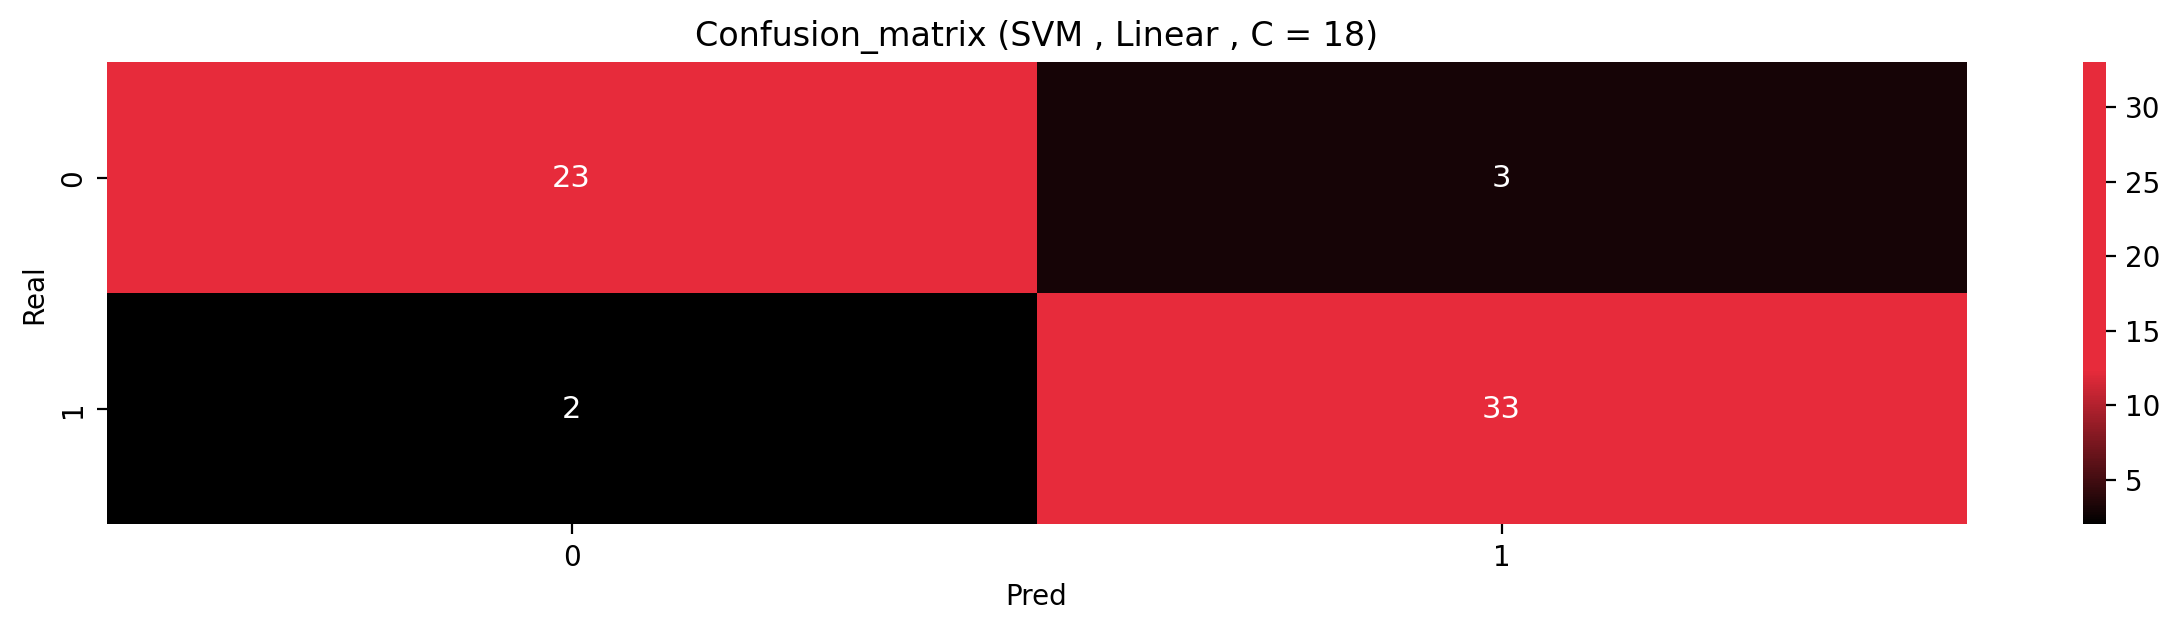

In [41]:
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Linear , C = 18)")
annot = np.array([[f"{conf_matrix_3[0, 0]}", f"{conf_matrix_3[0, 1]}"],
                  [f"{conf_matrix_3[1, 0]}", f"{conf_matrix_3[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_3,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

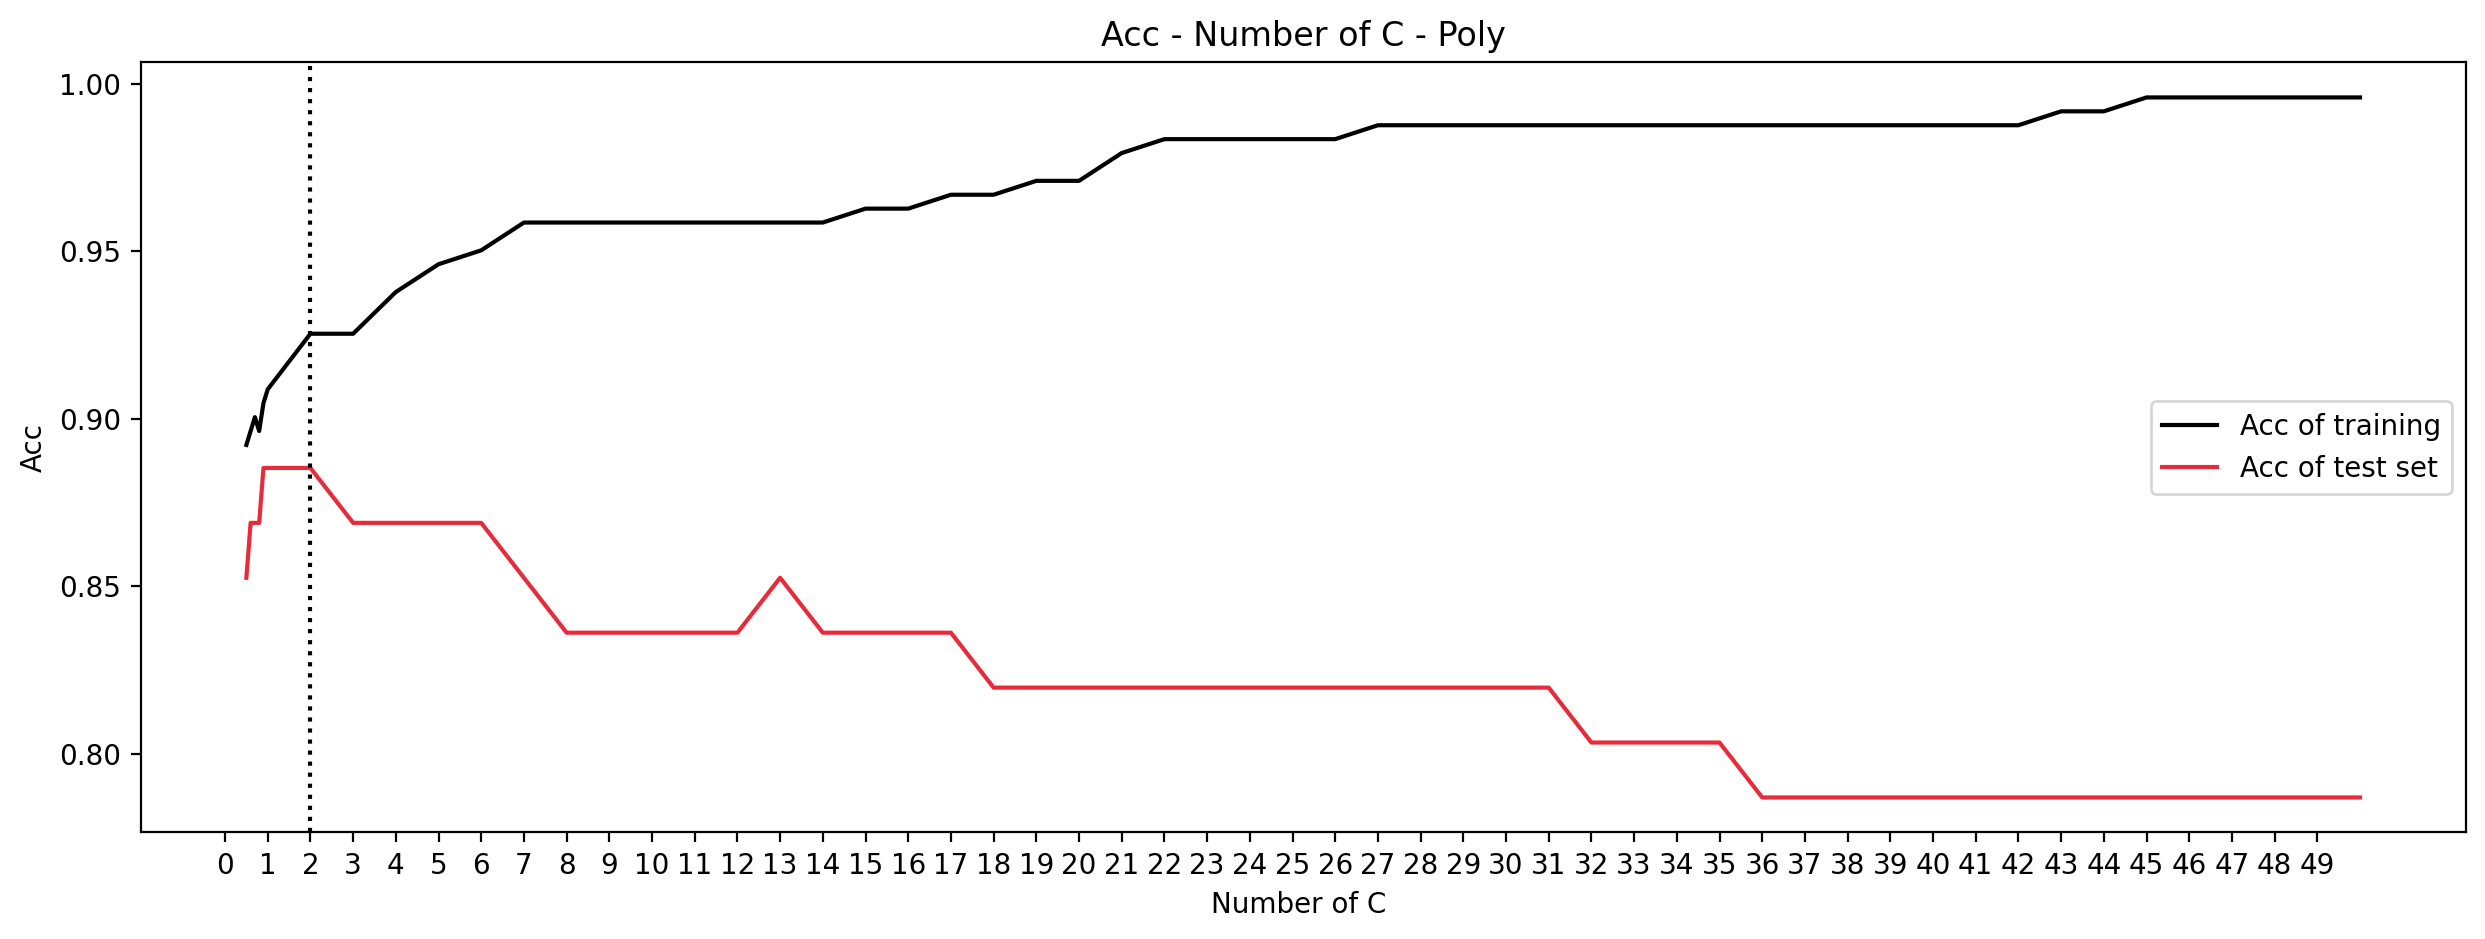

In [42]:
training_acc_4 = []
test_acc_4 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'poly')
    SVM.fit (X_train, y_train.ravel())
    training_acc_4.append(SVM.score(X_train,y_train))
    test_acc_4.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_4, label='Acc of training', color= 'black')
plt.plot(C, test_acc_4, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - Poly')
plt.legend()
plt.xticks(range(0,50))
plt.axvline(x = 2, linestyle= 'dotted', c= 'black')
plt.show()

In [43]:
model4 = SVC(C= 2, kernel= 'poly')
model4.fit(X_train, y_train.ravel())
y_pred_4 = model4.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_4))

Accuracy 0.8852459016393442


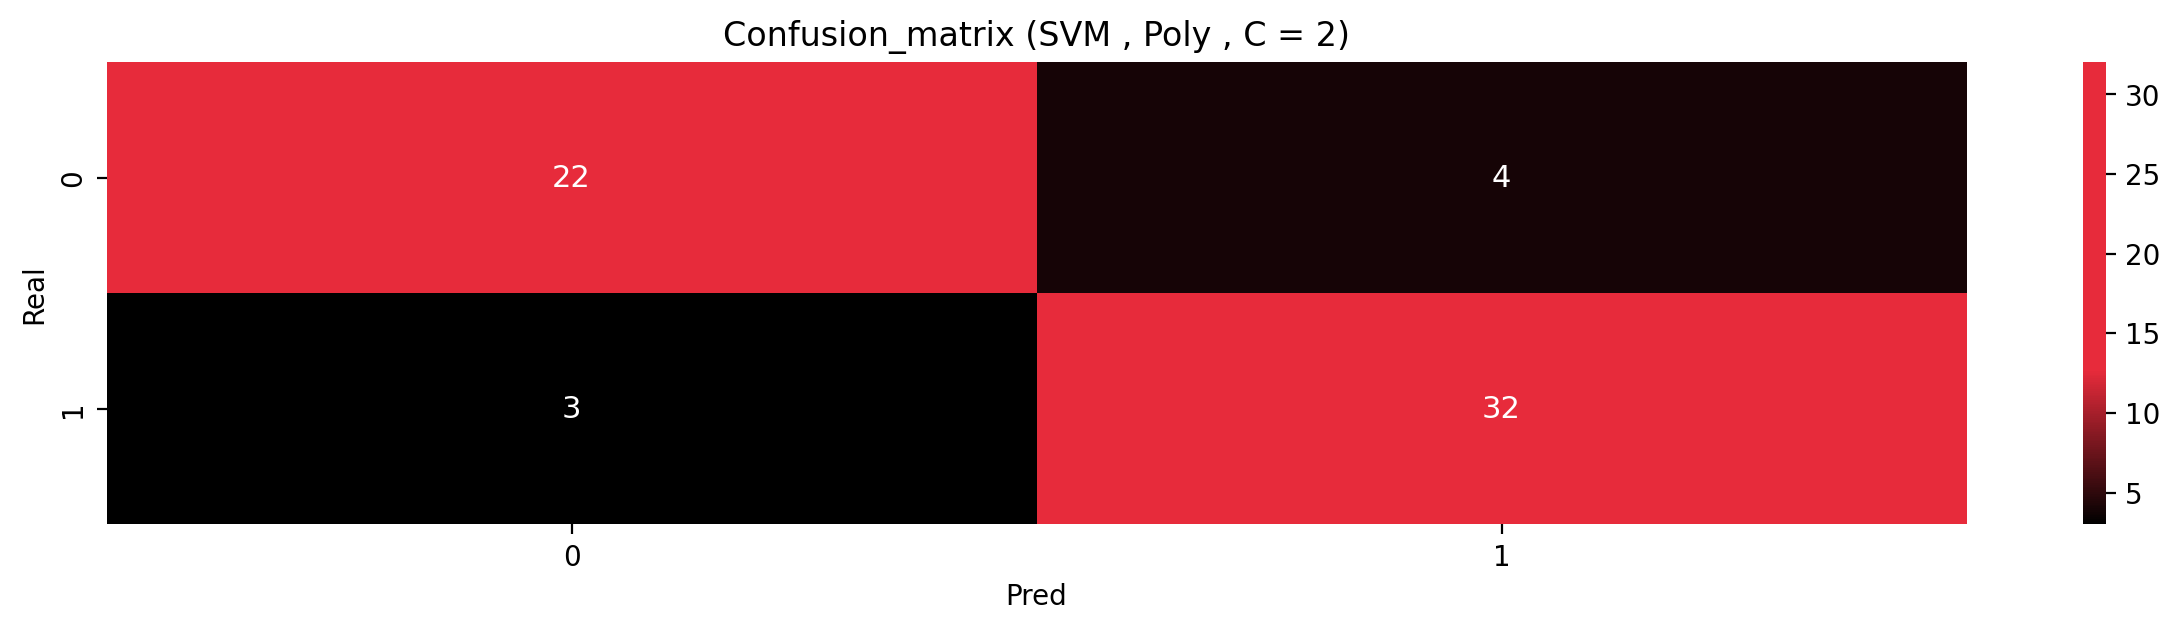

In [44]:
conf_matrix_4 = confusion_matrix(y_test, y_pred_4)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Poly , C = 2)")
annot = np.array([[f"{conf_matrix_4[0, 0]}", f"{conf_matrix_4[0, 1]}"],
                  [f"{conf_matrix_4[1, 0]}", f"{conf_matrix_4[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_4,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

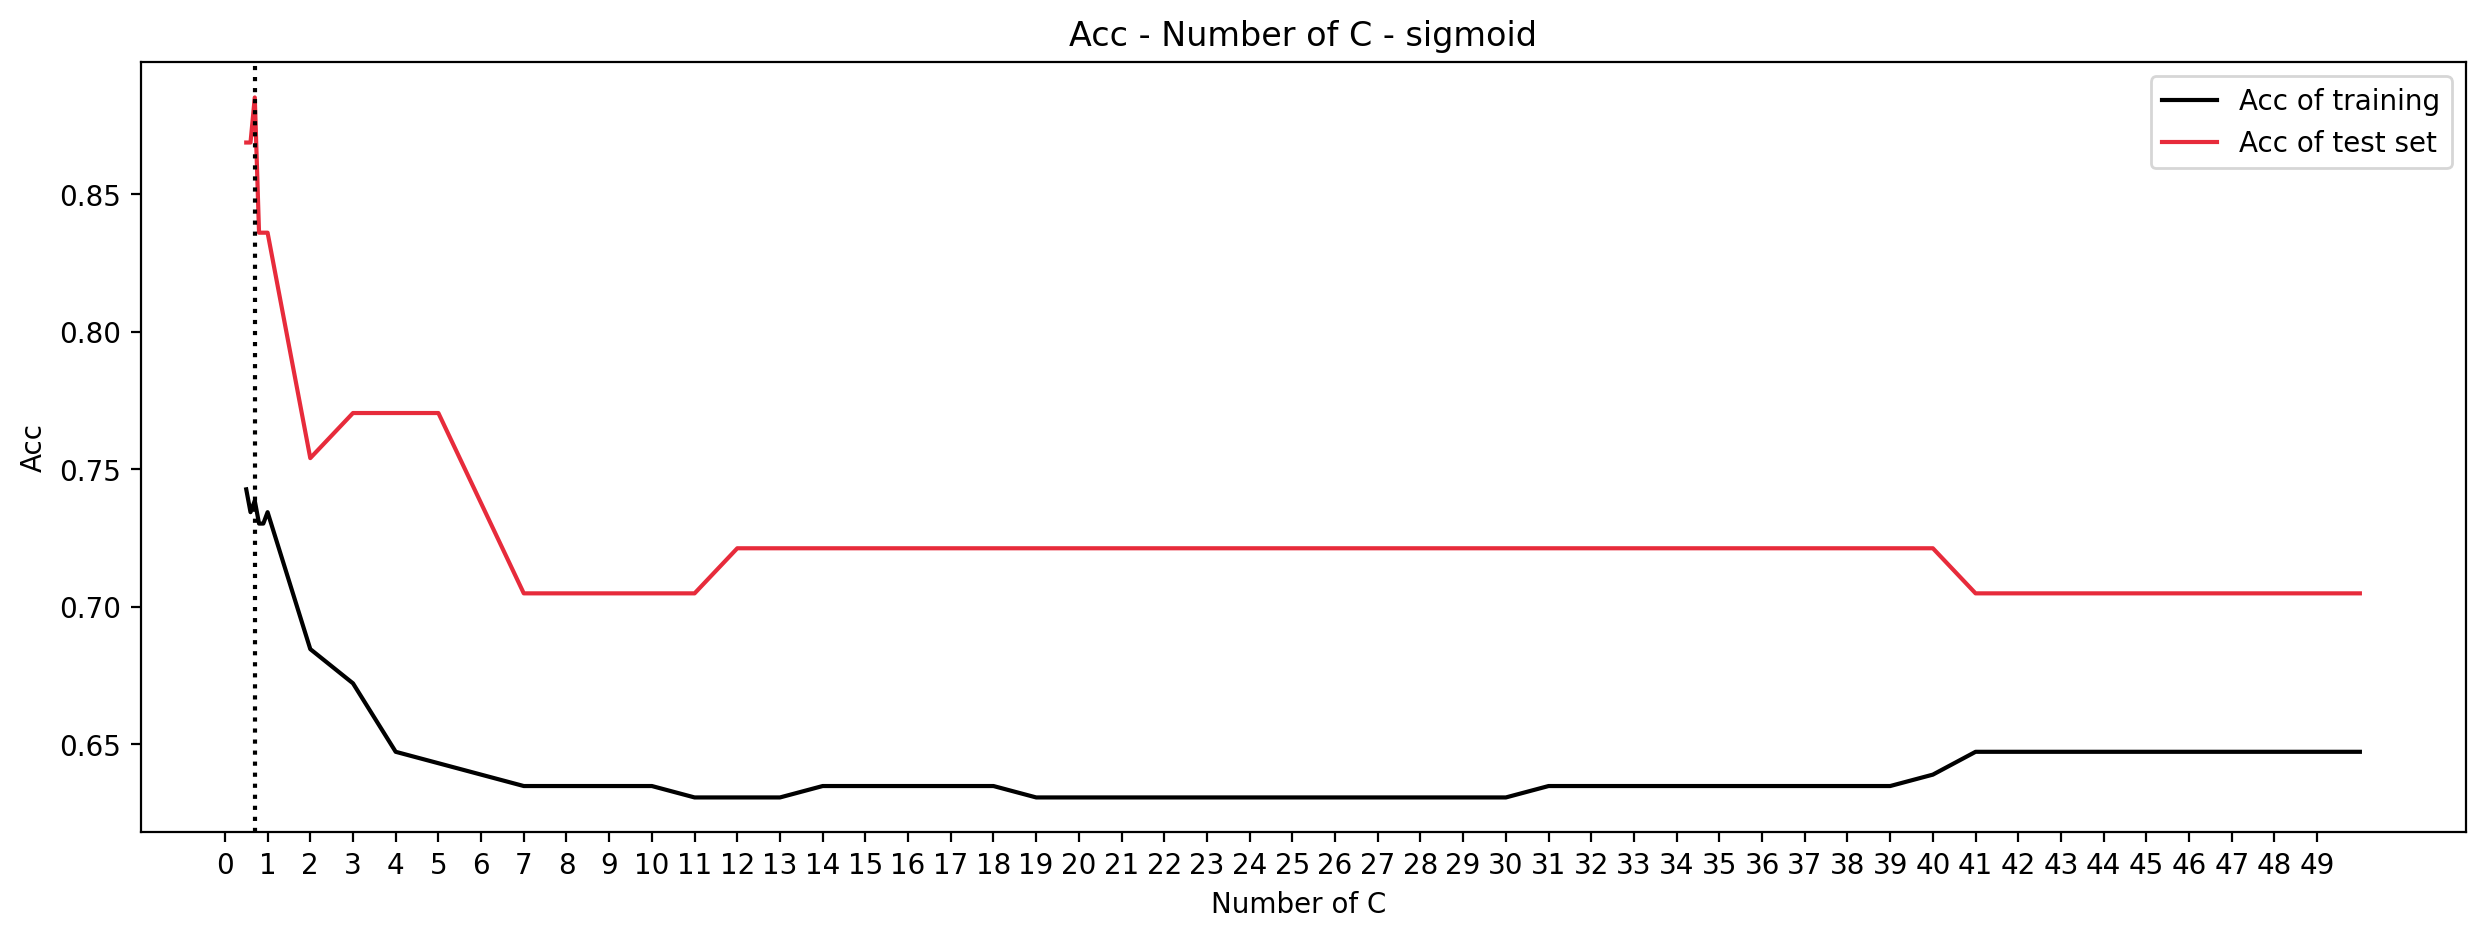

In [45]:
training_acc_5 = []
test_acc_5 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'sigmoid')
    SVM.fit (X_train, y_train.ravel())
    training_acc_5.append(SVM.score(X_train,y_train))
    test_acc_5.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_5, label='Acc of training', color= 'black')
plt.plot(C, test_acc_5, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - sigmoid')
plt.legend()
plt.xticks(range(0,50))
plt.axvline(x =0.7, linestyle= 'dotted', c= 'black')
plt.show()

In [46]:
model5 = SVC(C= 0.7, kernel= 'sigmoid')
model5.fit(X_train, y_train.ravel())
y_pred_5 = model5.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_5))

Accuracy 0.8852459016393442


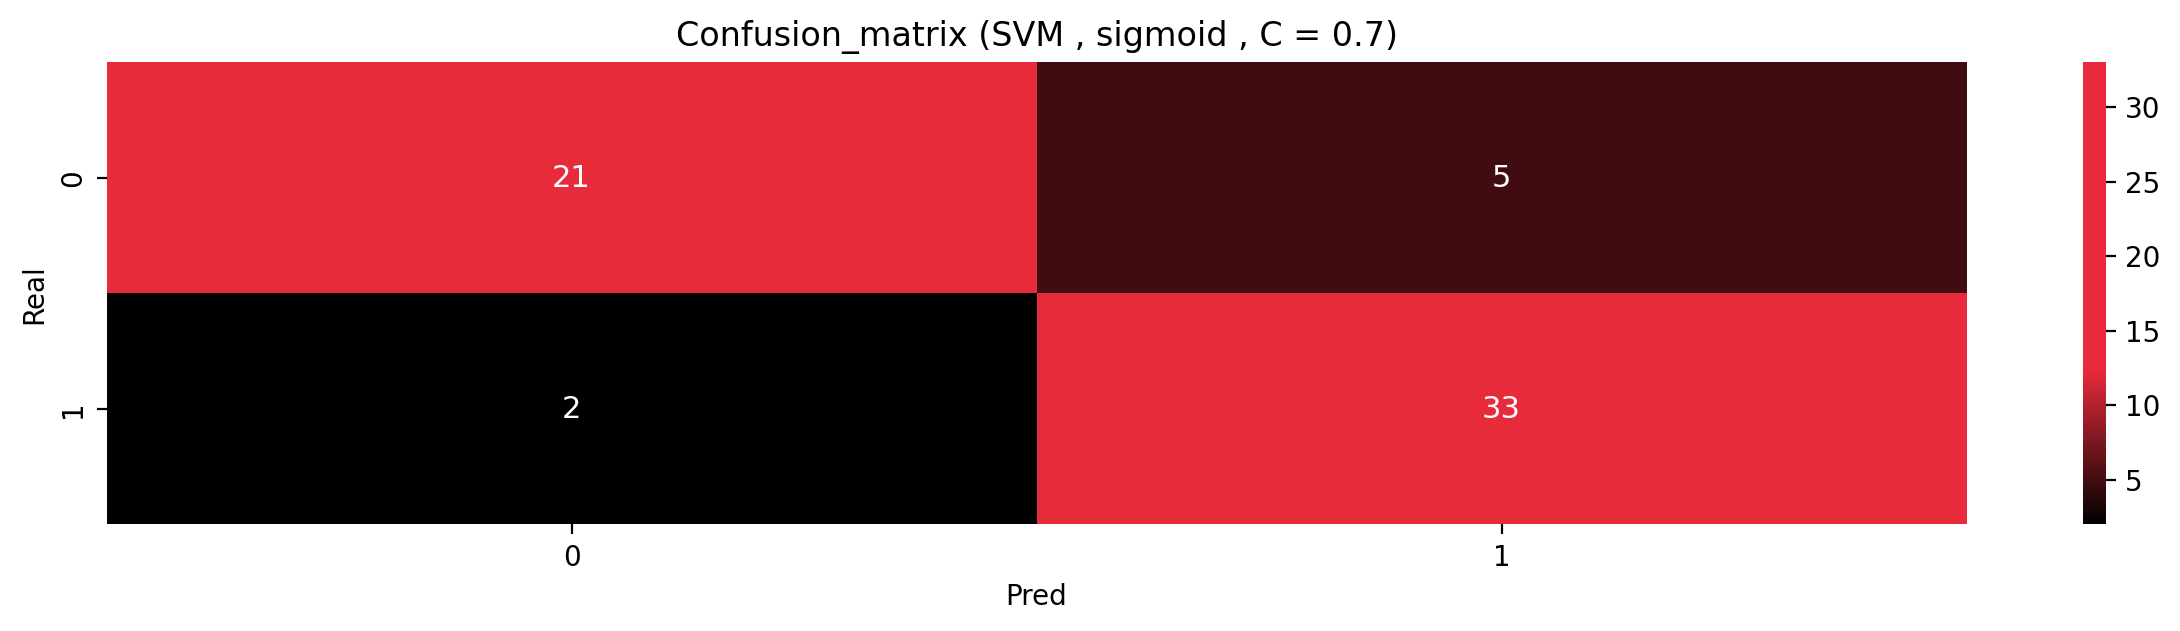

In [47]:
conf_matrix_5 = confusion_matrix(y_test, y_pred_5)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , sigmoid , C = 0.7)")
annot = np.array([[f"{conf_matrix_5[0, 0]}", f"{conf_matrix_5[0, 1]}"],
                  [f"{conf_matrix_5[1, 0]}", f"{conf_matrix_5[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_5,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [47]:
print(Back.RED +color.BOLD+ "Classification report for model3 (Svm, kernel = Linear, C = 20):"+ Back.RESET+ color.END)
print(classification_report(y_train, model3.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for model4 (Svm, kernel = Poly, C = 2):"+ Back.RESET+ color.END)
print(classification_report(y_train, model4.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for model5 (Svm, kernel = Sigmoid, C = 0.7):"+ Back.RESET+ color.END)
print(classification_report(y_train, model5.predict(X_train)))

Classification report for model3 (Svm, kernel = Linear, C = 20):
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       112
           1       0.82      0.93      0.87       129

    accuracy                           0.85       241
   macro avg       0.86      0.84      0.85       241
weighted avg       0.86      0.85      0.85       241

Classification report for model4 (Svm, kernel = Poly, C = 2):
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       112
           1       0.92      0.94      0.93       129

    accuracy                           0.93       241
   macro avg       0.93      0.92      0.92       241
weighted avg       0.93      0.93      0.93       241

Classification report for model5 (Svm, kernel = Sigmoid, C = 0.7):
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       112
           1       0.71      0.86      0.78

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; color:black ;padding:10px'>


* **Decision Trees + tune hyperparameters**

  - The third algorithm is Decision trees. In DT, I consider the range of max depth "1 - 20" and Criterions "gini, entropy and log_loss" as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



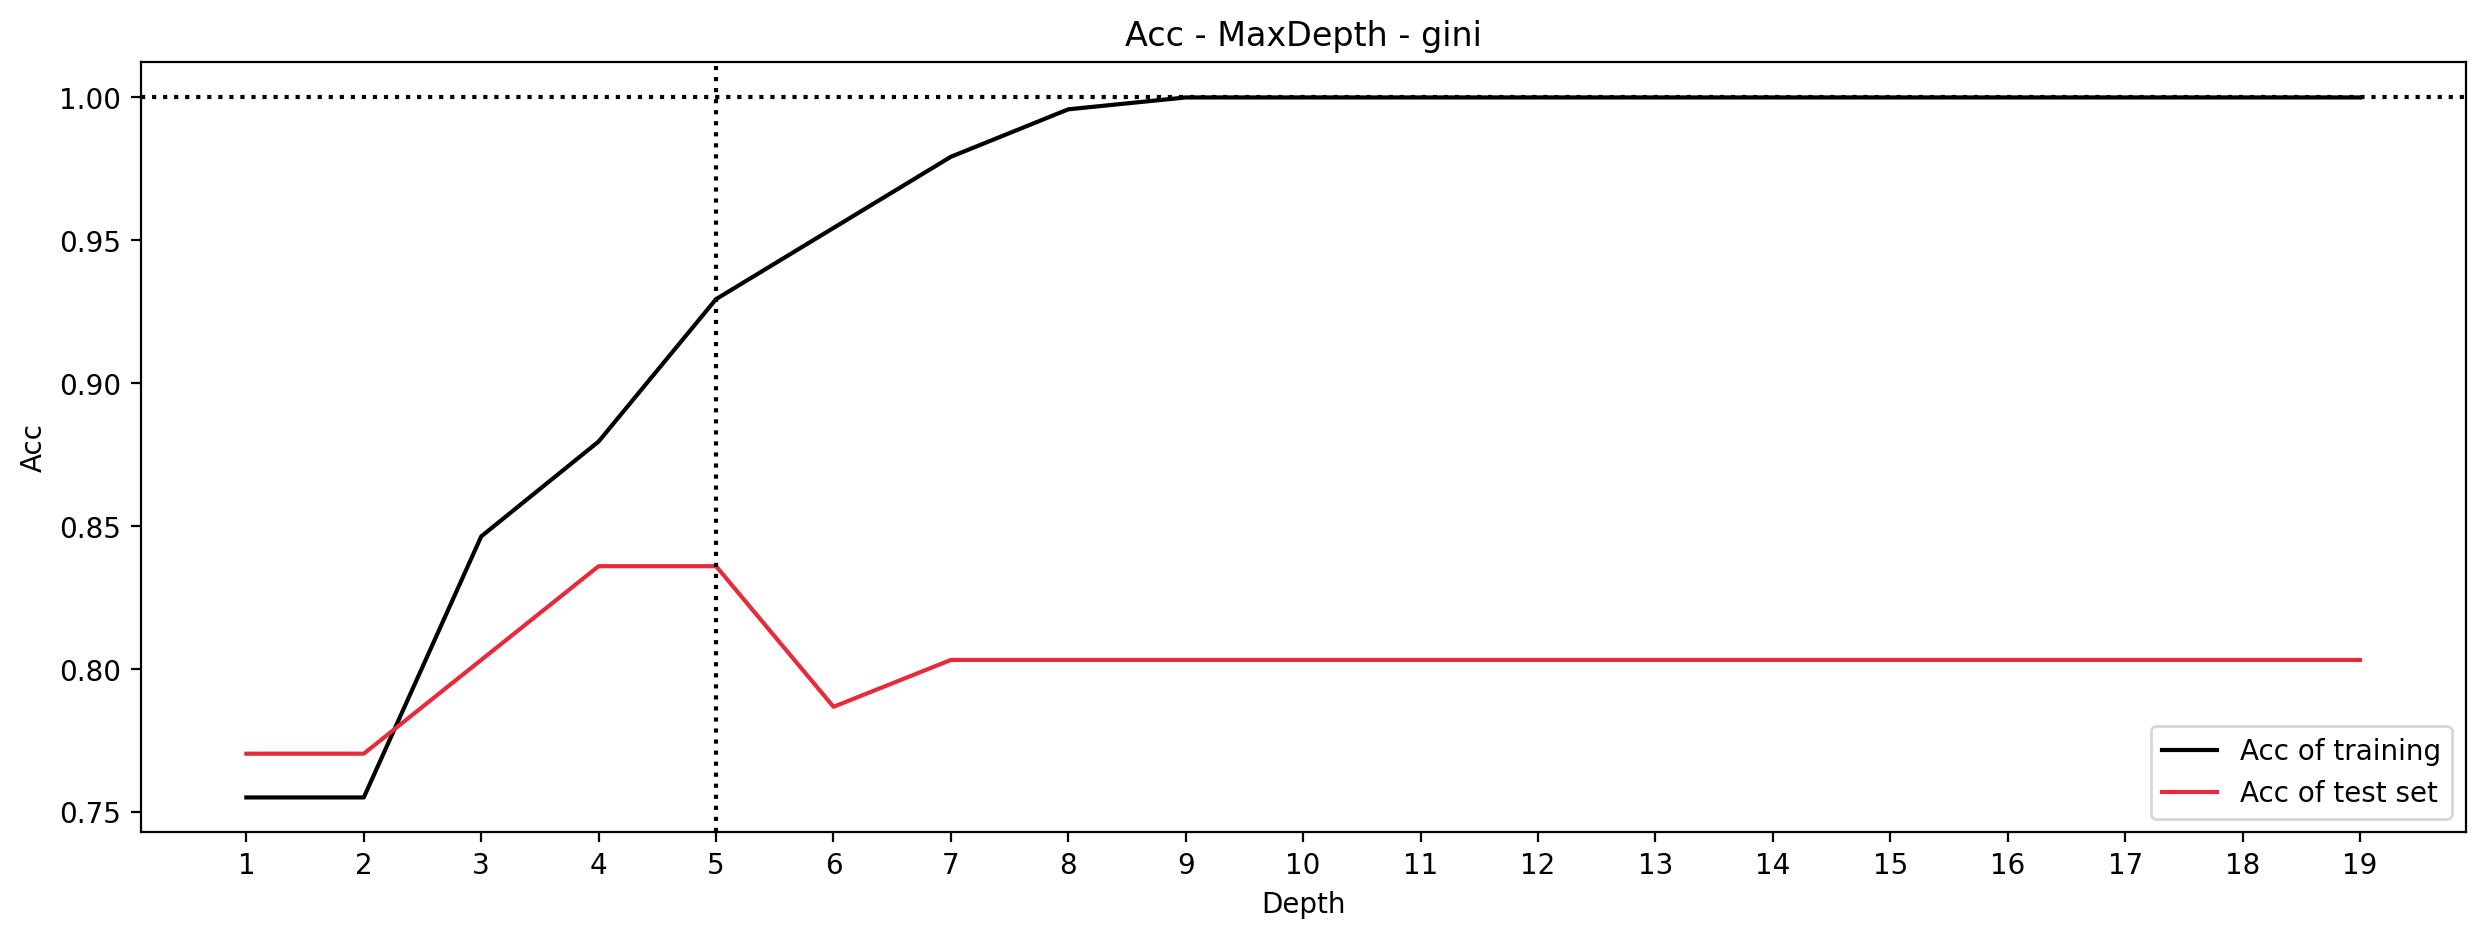

In [49]:
training_acc_6 = []
test_acc_6 = []

max_depth = range(1,20)
#Criterion = gini, entropy, log_loss

for depth in max_depth:
    DT = DecisionTreeClassifier(max_depth= depth, criterion= 'gini', random_state=40)
    DT.fit (X_train, y_train.ravel())
    training_acc_6.append(DT.score(X_train,y_train))
    test_acc_6.append(DT.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(max_depth, training_acc_6, label='Acc of training', color= 'black')
plt.plot(max_depth, test_acc_6, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Depth')
plt.title('Acc - MaxDepth - gini')
plt.legend()
plt.xticks(range(1,20))
plt.axvline(x =5, linestyle= 'dotted', c= 'black')
plt.axhline(y =1, linestyle= 'dotted', c= 'black')
plt.show();

In [50]:
model6 = DecisionTreeClassifier(max_depth = 5 , criterion= 'gini', random_state=40)
model6.fit(X_train, y_train.ravel())
y_pred_6 = model6.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_6))
Best_DT = metrics.accuracy_score(y_test,y_pred_6)

Accuracy 0.8360655737704918


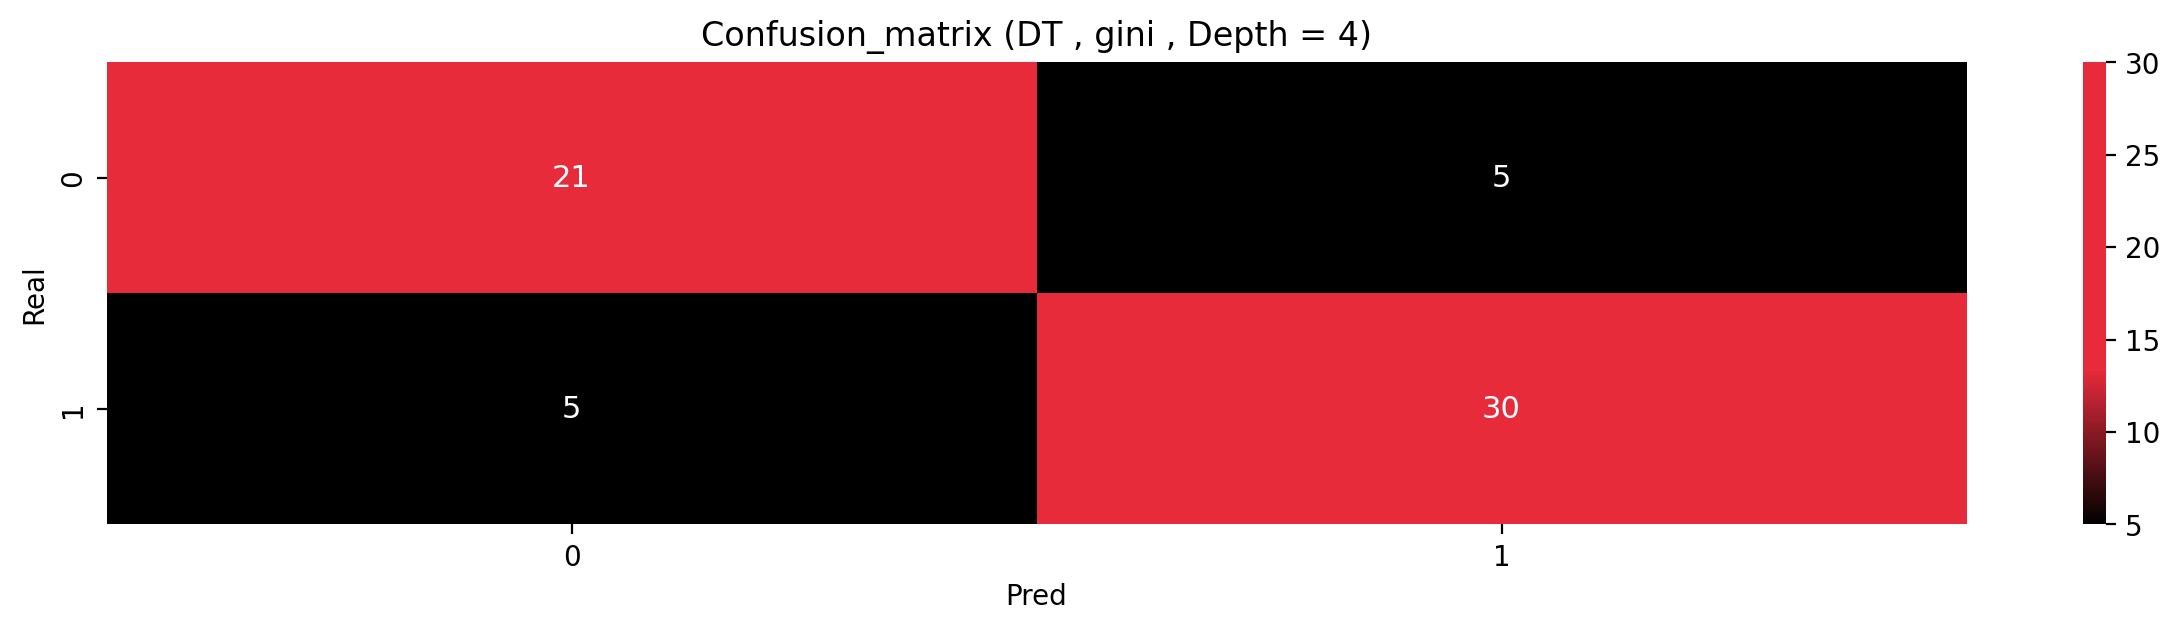

In [51]:
conf_matrix_6 = confusion_matrix(y_test, y_pred_6)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (DT , gini , Depth = 4)")
annot = np.array([[f"{conf_matrix_6[0, 0]}", f"{conf_matrix_6[0, 1]}"],
                  [f"{conf_matrix_6[1, 0]}", f"{conf_matrix_6[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_6,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [52]:
print(Back.RED +color.BOLD+ "Classification report for model6 (DT, criterion = gini, Depth = 4):"+ Back.RESET+ color.END)
print(classification_report(y_train, model6.predict(X_train)))

Classification report for model6 (DT, criterion = gini, Depth = 4):
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       112
           1       0.91      0.97      0.94       129

    accuracy                           0.93       241
   macro avg       0.93      0.93      0.93       241
weighted avg       0.93      0.93      0.93       241



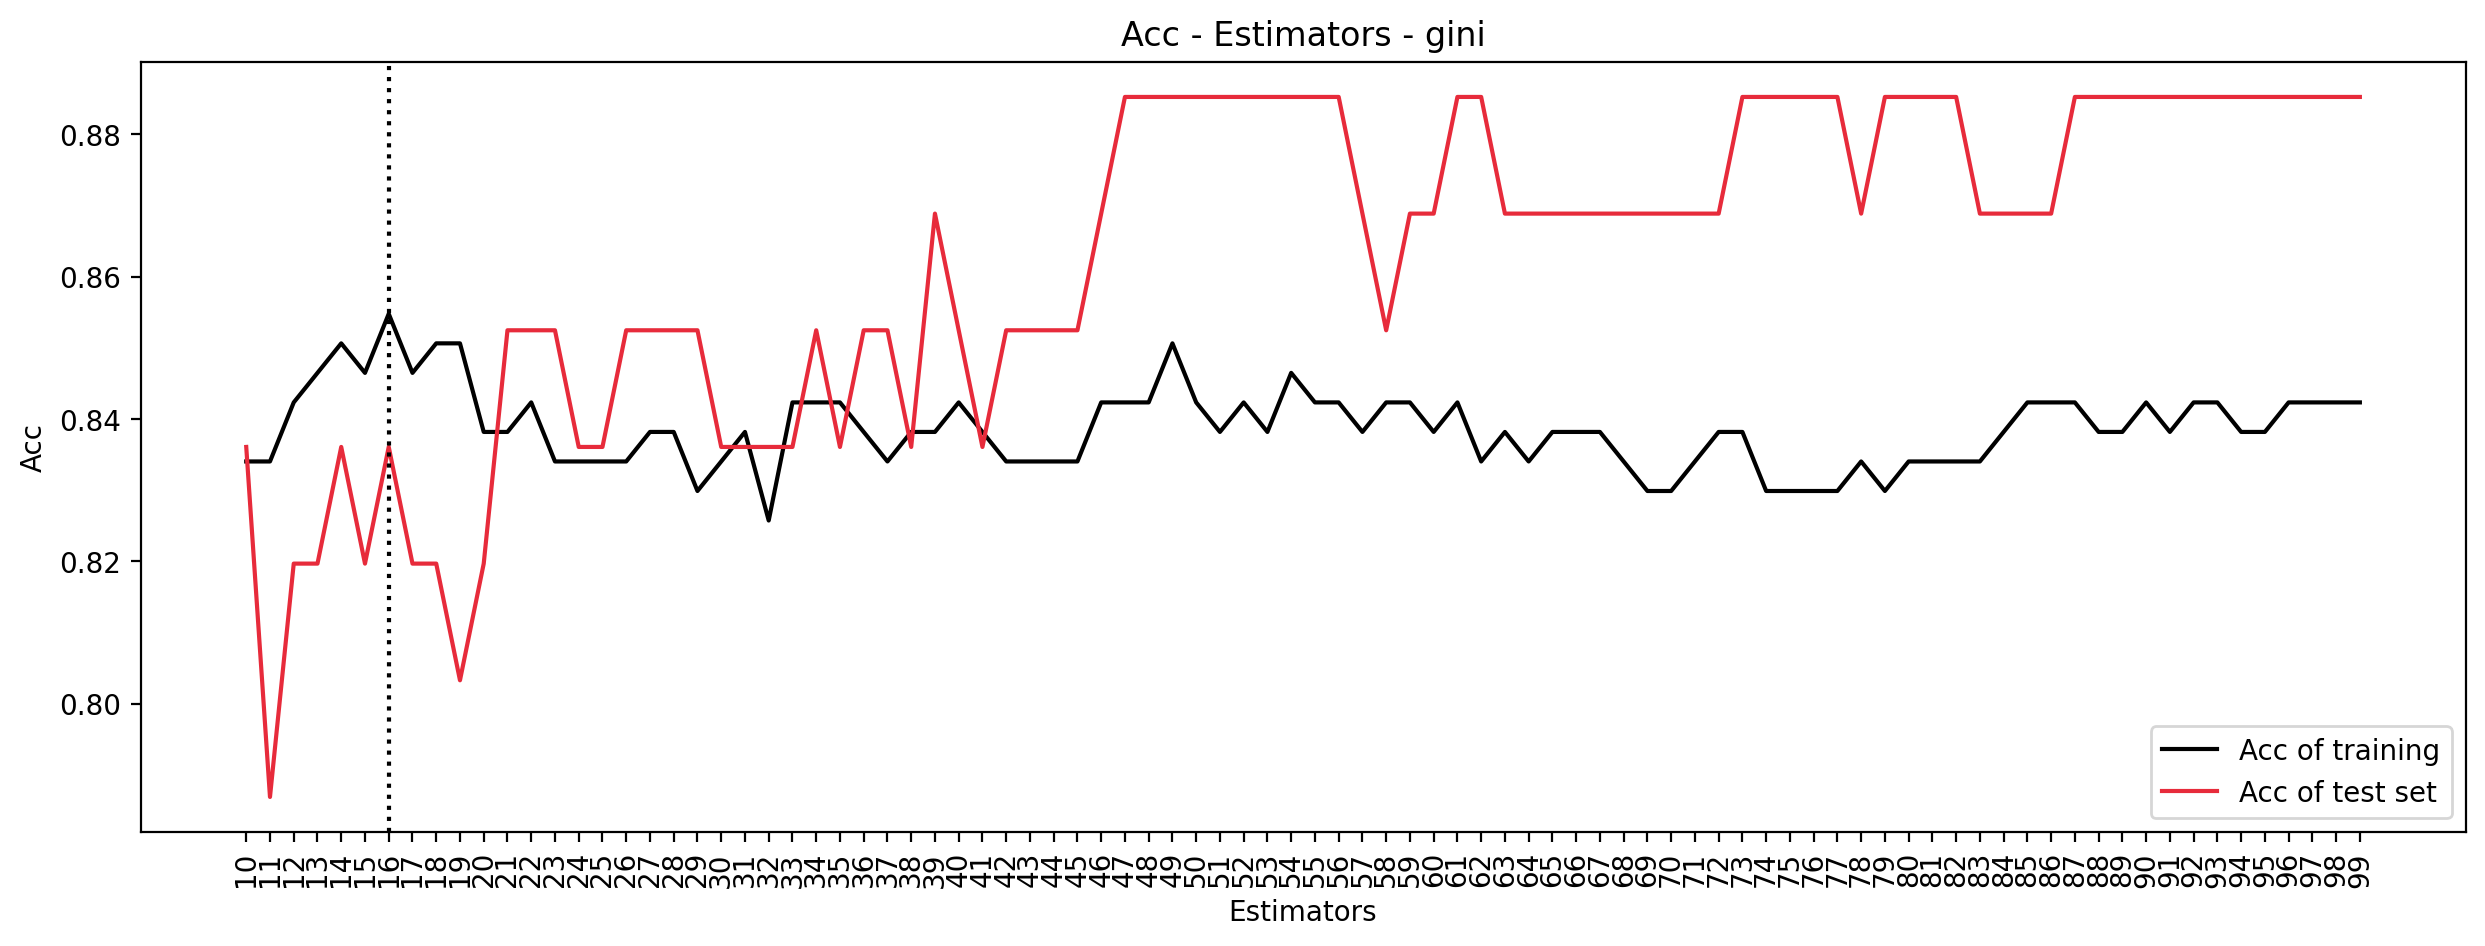

In [53]:
training_acc_7 = []
test_acc_7 = []

n_estimators = range(10,100)
#Criterion = gini, entropy

for estimator in n_estimators:
    RF = RandomForestClassifier(n_estimators= estimator, criterion= 'gini', random_state=40, max_depth= 2)
    RF.fit (X_train, y_train.ravel())
    training_acc_7.append(RF.score(X_train,y_train))
    test_acc_7.append(RF.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(n_estimators, training_acc_7, label='Acc of training', color= 'black')
plt.plot(n_estimators, test_acc_7, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Estimators')
plt.title('Acc - Estimators - gini')
plt.legend()
plt.xticks(range(10, 100), rotation=90)
plt.axvline(x =16, linestyle= 'dotted', c= 'black')
plt.show();

In [54]:
model7 = RandomForestClassifier(max_depth = 2, criterion= 'gini', random_state=40, n_estimators= 16)
model7.fit(X_train, y_train.ravel())
y_pred_7 = model7.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_7))
Best_RF = metrics.accuracy_score(y_test,y_pred_7)

Accuracy 0.8360655737704918


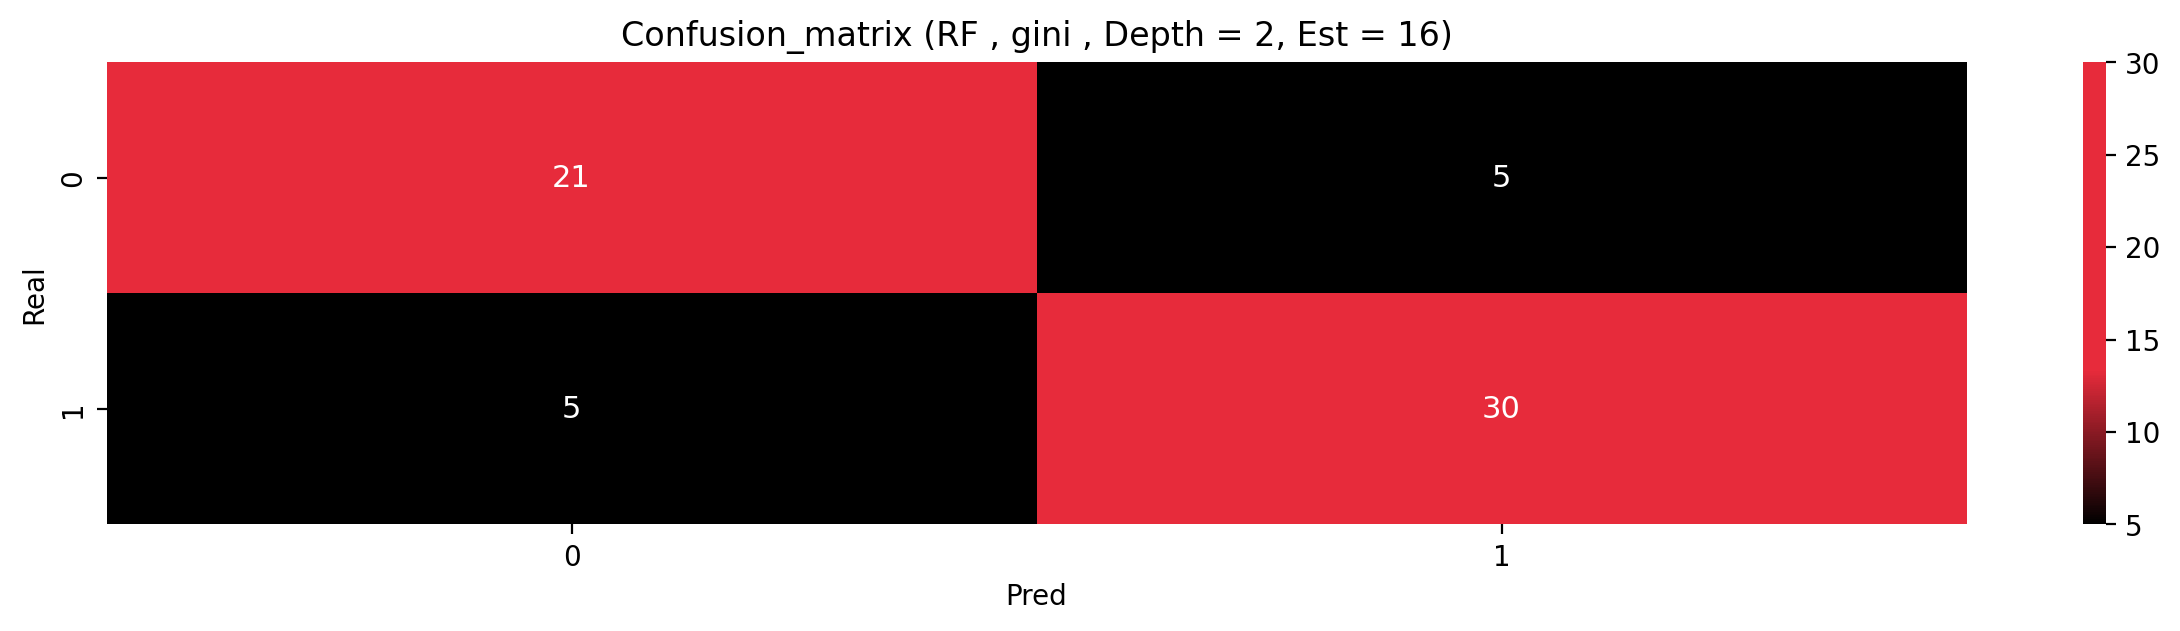

In [55]:
conf_matrix_7 = confusion_matrix(y_test, y_pred_7)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (RF , gini , Depth = 2, Est = 16)")
annot = np.array([[f"{conf_matrix_7[0, 0]}", f"{conf_matrix_7[0, 1]}"],
                  [f"{conf_matrix_7[1, 0]}", f"{conf_matrix_7[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_7,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [56]:
print(Back.RED +color.BOLD+ "Classification report for model7 (RF, criterion = gini, Depth = 2, N_Estimators = 16):"
      + Back.RESET+ color.END)
print(classification_report(y_train, model7.predict(X_train)))


Classification report for model7 (RF, criterion = gini, Depth = 2, N_Estimators = 16):
              precision    recall  f1-score   support

           0       0.89      0.79      0.83       112
           1       0.83      0.91      0.87       129

    accuracy                           0.85       241
   macro avg       0.86      0.85      0.85       241
weighted avg       0.86      0.85      0.85       241



<a id="6"></a>
# <p style="padding:10px;background-color:white ;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Conclusion</p>

<div style = 'border : 3px solid non; background-color:white ; color:black ;padding:10px'>




  - As mentioned before, The samples in this dataset are really few. Because of that, Random forest and Decision trees didn't work well on this dataset. Instead of that, SVM and KNN worked well. So let's take a quick view on the comparison between each algorithm.
    



In [57]:



Best_models = pd.DataFrame({'Best_models_acc': [Best_SVM, Best_DT, Best_knn, Best_RF],
               'Best_models_name': ('SVM', 'Decision tree', 'KNN', 'Random Forest')})
Best_models.sort_values(by='Best_models_acc',ascending=False ,inplace = True)
Best_models

,Best_models_acc,Best_models_name
0,0.918033,SVM
2,0.901639,KNN
1,0.836066,Decision tree
3,0.836066,Random Forest


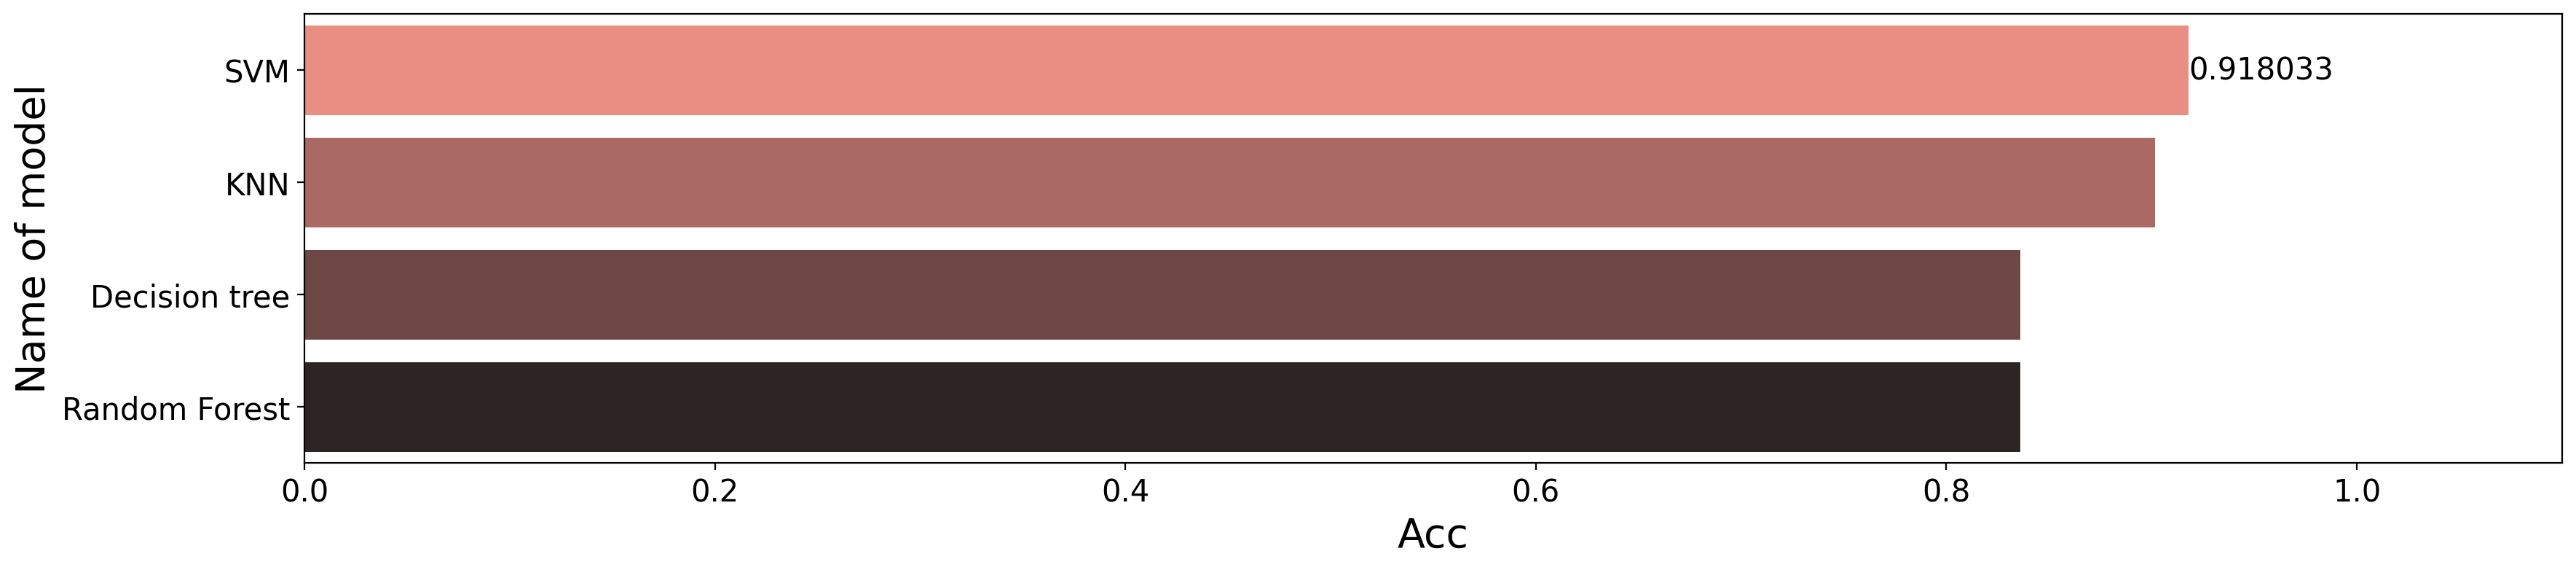

In [58]:
plt.figure(figsize=(20,4),dpi=200)
ax = sns.barplot(x= Best_models['Best_models_acc'], y= Best_models['Best_models_name'], palette="dark:salmon_r")
ax.bar_label(ax.containers[0],fontsize=15)
plt.xlabel("Acc",fontsize=20)
plt.ylabel("Name of model", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlim([0, 1.1])
plt.show()